In [262]:
%matplotlib inline
import rpy2
import rpy2.robjects.packages as rpackages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [263]:
weightmin=[]
dmin=[]

In [388]:
fn_list = ["./igo2004.csv","./igoSet1995.csv","./igoSet2000.csv","./igoSet2005.csv","./O13.csv","./O7.csv","./O4.csv","./O3.csv","./O2.csv"]

In [850]:
fn = fn_list[4]#bis einschl. 6 "./igoSet2005.csv"
%Rpush fn

In [851]:
%%R
df <- read.table(fn,sep=",")

In [852]:
%%R
df

      V1       V2
1     NA   ioname
2   2024  AralSea
3   2074     AsDB
4   2584    CAECC
5   3247     CICA
6   3278      CIS
7   3974     EAPO
8   3990     EBRD
9   4125      ECO
10  4527    EMPPO
11  4954      FAO
12  5561     IAEA
13  6144      ICC
14  6797   ICivDO
15  6903     IEXB
16  6935     IFAD
17  7047      IGC
18  7399      IMO
19  7639 INTERPOL
20  7789     IOLM
21  7833    IOMig
22  7958     IOcC
23  8219      ISB
24  8251     ISDB
25  8459    ITVRC
26  8635   IUPLAW
27  8677   IUPNVP
28  8911     JINR
29  9429     MIGA
30  9601      NAM
31 10448      OIC
32 10586     OSCE
33 10865      PCA
34 10989    PIARC
35 11279      RCC
36 11932  Turksoy
37 12244   UNESCO
38 12284    UNIDO
39 12815      WTO
40 12846   WTOURO
                                                                   V3   V4
1                                                             orgname year
2                                      Int'l Fund for Saving Aral Sea 2005
3                                    

In [853]:
%%R
df[i,][5:length(df[i,])]

      V5    V6         V7         V8         V9          V10        V11 V12
1 russia china kazakhstan kyrgyzstan tajikistan turkmenistan uzbekistan usa


In [854]:
%%R
x <- matrix(0, nrow = length(df[i,][5:length(df[i,])]), ncol = length(df[i,][5:length(df[i,])]))
for (i in 2:length(df[,1])) {
    print (i)
    print (df[i,][5:length(df[i,])])
    print (length(df[i,][5:length(df[i,])]))
    
    for (j in 1:length(df[i,][5:length(df[i,])])){
        print (j)
        print (df[i,][5:length(df[i,])][j])
        if (df[i,][5:length(df[i,])][j]==0){
            print ("zero")
        }else{
            for (k in 1:length(df[i,][5:length(df[i,])])){
                print (k)
                if (df[i,][5:length(df[i,])][k]==1){
                print (x[k,j])
                x[k,j]=x[k,j]+1
                print (x[k,j])
                print ("target")
                }
            }
        }
    }
    #for (country_val in df[i,][5:length(df[i,])]){
    #    print (country_val)
    #    if (country_val==0) {
    #    
    #    print ("bla")
    #    }else {
    #    print ("nobla")
    #    }
    #    
    #}
}

[1] 2
  V5 V6 V7 V8 V9 V10 V11 V12
2  0  0  1  1  1   1   1   0
[1] 8
[1] 1
  V5
2  0
[1] "zero"
[1] 2
  V6
2  0
[1] "zero"
[1] 3
  V7
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 4
  V8
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 5
  V9
2  1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 6
  V10
2   1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "target"
[1] 6
[1] 0
[1] 1
[1] "target"
[1] 7
[1] 0
[1] 1
[1] "target"
[1] 8
[1] 7
  V11
2   1
[1] 1
[1] 2
[1] 3
[1] 0
[1] 1
[1] "target"
[1] 4
[1] 0
[1] 1
[1] "target"
[1] 5
[1] 0
[1] 1
[1] "tar

In [855]:
%%R
degree(x)


Error in degree(x) : could not find function "degree"


In [856]:
%%R
length(df[i,][0:length(df[i,])])

[1] 12


In [857]:
%%R
for (j in 5:length(df[i,][0:length(df[i,])])){
    a = 0
for (i in df[, j][2:length(df[, j])]){
    #print (class(i))
    a = a + as.numeric(i) 
}
    print (a)
}

[1] 26
[1] 20
[1] 32
[1] 30
[1] 20
[1] 18
[1] 26
[1] 18


In [858]:
%%R
x

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]   26   16   23   19   11   11   19   13
[2,]   16   20   16   15    7    6   12   14
[3,]   23   16   32   26   19   16   23   14
[4,]   19   15   26   30   19   16   23   13
[5,]   11    7   19   19   20   12   15    7
[6,]   11    6   16   16   12   18   14    5
[7,]   19   12   23   23   15   14   26    9
[8,]   13   14   14   13    7    5    9   18


In [859]:
%Rpull x

In [860]:
print x

[[ 26.  16.  23.  19.  11.  11.  19.  13.]
 [ 16.  20.  16.  15.   7.   6.  12.  14.]
 [ 23.  16.  32.  26.  19.  16.  23.  14.]
 [ 19.  15.  26.  30.  19.  16.  23.  13.]
 [ 11.   7.  19.  19.  20.  12.  15.   7.]
 [ 11.   6.  16.  16.  12.  18.  14.   5.]
 [ 19.  12.  23.  23.  15.  14.  26.   9.]
 [ 13.  14.  14.  13.   7.   5.   9.  18.]]


In [861]:
with open("./plots_adjusted_new/%s"%(fn.replace("./","")), "wb") as f:
    np.savetxt(f, x.astype(int), fmt='%i', delimiter=",")

In [862]:
%%R
y = df[1, ][5:length(df[i,][0:length(df[i,])])]

In [863]:
%Rpull y

In [864]:
print y

       V5     V6          V7          V8          V9           V10  \
1  russia  china  kazakhstan  kyrgyzstan  tajikistan  turkmenistan   

          V11  V12  
1  uzbekistan  usa  


In [865]:
type(y)

pandas.core.frame.DataFrame

In [866]:
c = []
for index, row in y.iterrows():
    for i in row:
        c.append(i)

In [867]:
#a = np.loadtxt("bla1.csv", delimiter=',', unpack=True)
a = x

In [868]:
#with open("country.csv") as f:
#    for line in f:
#        c = line.replace("\"","").replace("\n","").split(",")

In [869]:
print(c)

['russia', 'china', 'kazakhstan', 'kyrgyzstan', 'tajikistan', 'turkmenistan', 'uzbekistan', 'usa']


In [870]:
print(a)

[[ 26.  16.  23.  19.  11.  11.  19.  13.]
 [ 16.  20.  16.  15.   7.   6.  12.  14.]
 [ 23.  16.  32.  26.  19.  16.  23.  14.]
 [ 19.  15.  26.  30.  19.  16.  23.  13.]
 [ 11.   7.  19.  19.  20.  12.  15.   7.]
 [ 11.   6.  16.  16.  12.  18.  14.   5.]
 [ 19.  12.  23.  23.  15.  14.  26.   9.]
 [ 13.  14.  14.  13.   7.   5.   9.  18.]]


In [871]:
d = a.diagonal()

In [872]:
print(d.tolist())

[26.0, 20.0, 32.0, 30.0, 20.0, 18.0, 26.0, 18.0]


In [873]:
b = np.triu(a)

In [874]:
np.fill_diagonal(b, 0)

In [875]:
print(b)

[[  0.  16.  23.  19.  11.  11.  19.  13.]
 [  0.   0.  16.  15.   7.   6.  12.  14.]
 [  0.   0.   0.  26.  19.  16.  23.  14.]
 [  0.   0.   0.   0.  19.  16.  23.  13.]
 [  0.   0.   0.   0.   0.  12.  15.   7.]
 [  0.   0.   0.   0.   0.   0.  14.   5.]
 [  0.   0.   0.   0.   0.   0.   0.   9.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [876]:
G=nx.Graph()
for idx,i in enumerate(b):
    for idy,j in enumerate(i):
        if j!=0:
            print idx,idy
            print(c[idx],c[idy],j)
            G.add_edge(c[idx],c[idy],weight=j)

0 1
('russia', 'china', 16.0)
0 2
('russia', 'kazakhstan', 23.0)
0 3
('russia', 'kyrgyzstan', 19.0)
0 4
('russia', 'tajikistan', 11.0)
0 5
('russia', 'turkmenistan', 11.0)
0 6
('russia', 'uzbekistan', 19.0)
0 7
('russia', 'usa', 13.0)
1 2
('china', 'kazakhstan', 16.0)
1 3
('china', 'kyrgyzstan', 15.0)
1 4
('china', 'tajikistan', 7.0)
1 5
('china', 'turkmenistan', 6.0)
1 6
('china', 'uzbekistan', 12.0)
1 7
('china', 'usa', 14.0)
2 3
('kazakhstan', 'kyrgyzstan', 26.0)
2 4
('kazakhstan', 'tajikistan', 19.0)
2 5
('kazakhstan', 'turkmenistan', 16.0)
2 6
('kazakhstan', 'uzbekistan', 23.0)
2 7
('kazakhstan', 'usa', 14.0)
3 4
('kyrgyzstan', 'tajikistan', 19.0)
3 5
('kyrgyzstan', 'turkmenistan', 16.0)
3 6
('kyrgyzstan', 'uzbekistan', 23.0)
3 7
('kyrgyzstan', 'usa', 13.0)
4 5
('tajikistan', 'turkmenistan', 12.0)
4 6
('tajikistan', 'uzbekistan', 15.0)
4 7
('tajikistan', 'usa', 7.0)
5 6
('turkmenistan', 'uzbekistan', 14.0)
5 7
('turkmenistan', 'usa', 5.0)
6 7
('uzbekistan', 'usa', 9.0)


In [877]:
abgl=[]
for i in G:
    abgl.append(i)
ddd = (d*1000-13000.0).tolist()
dddnew=[]
for i in abgl:
    print i 
    print c.index(i)
    abgl.index(i)
    dddnew.append(ddd[c.index(i)])

kyrgyzstan
3
turkmenistan
5
usa
7
tajikistan
4
uzbekistan
6
china
1
kazakhstan
2
russia
0


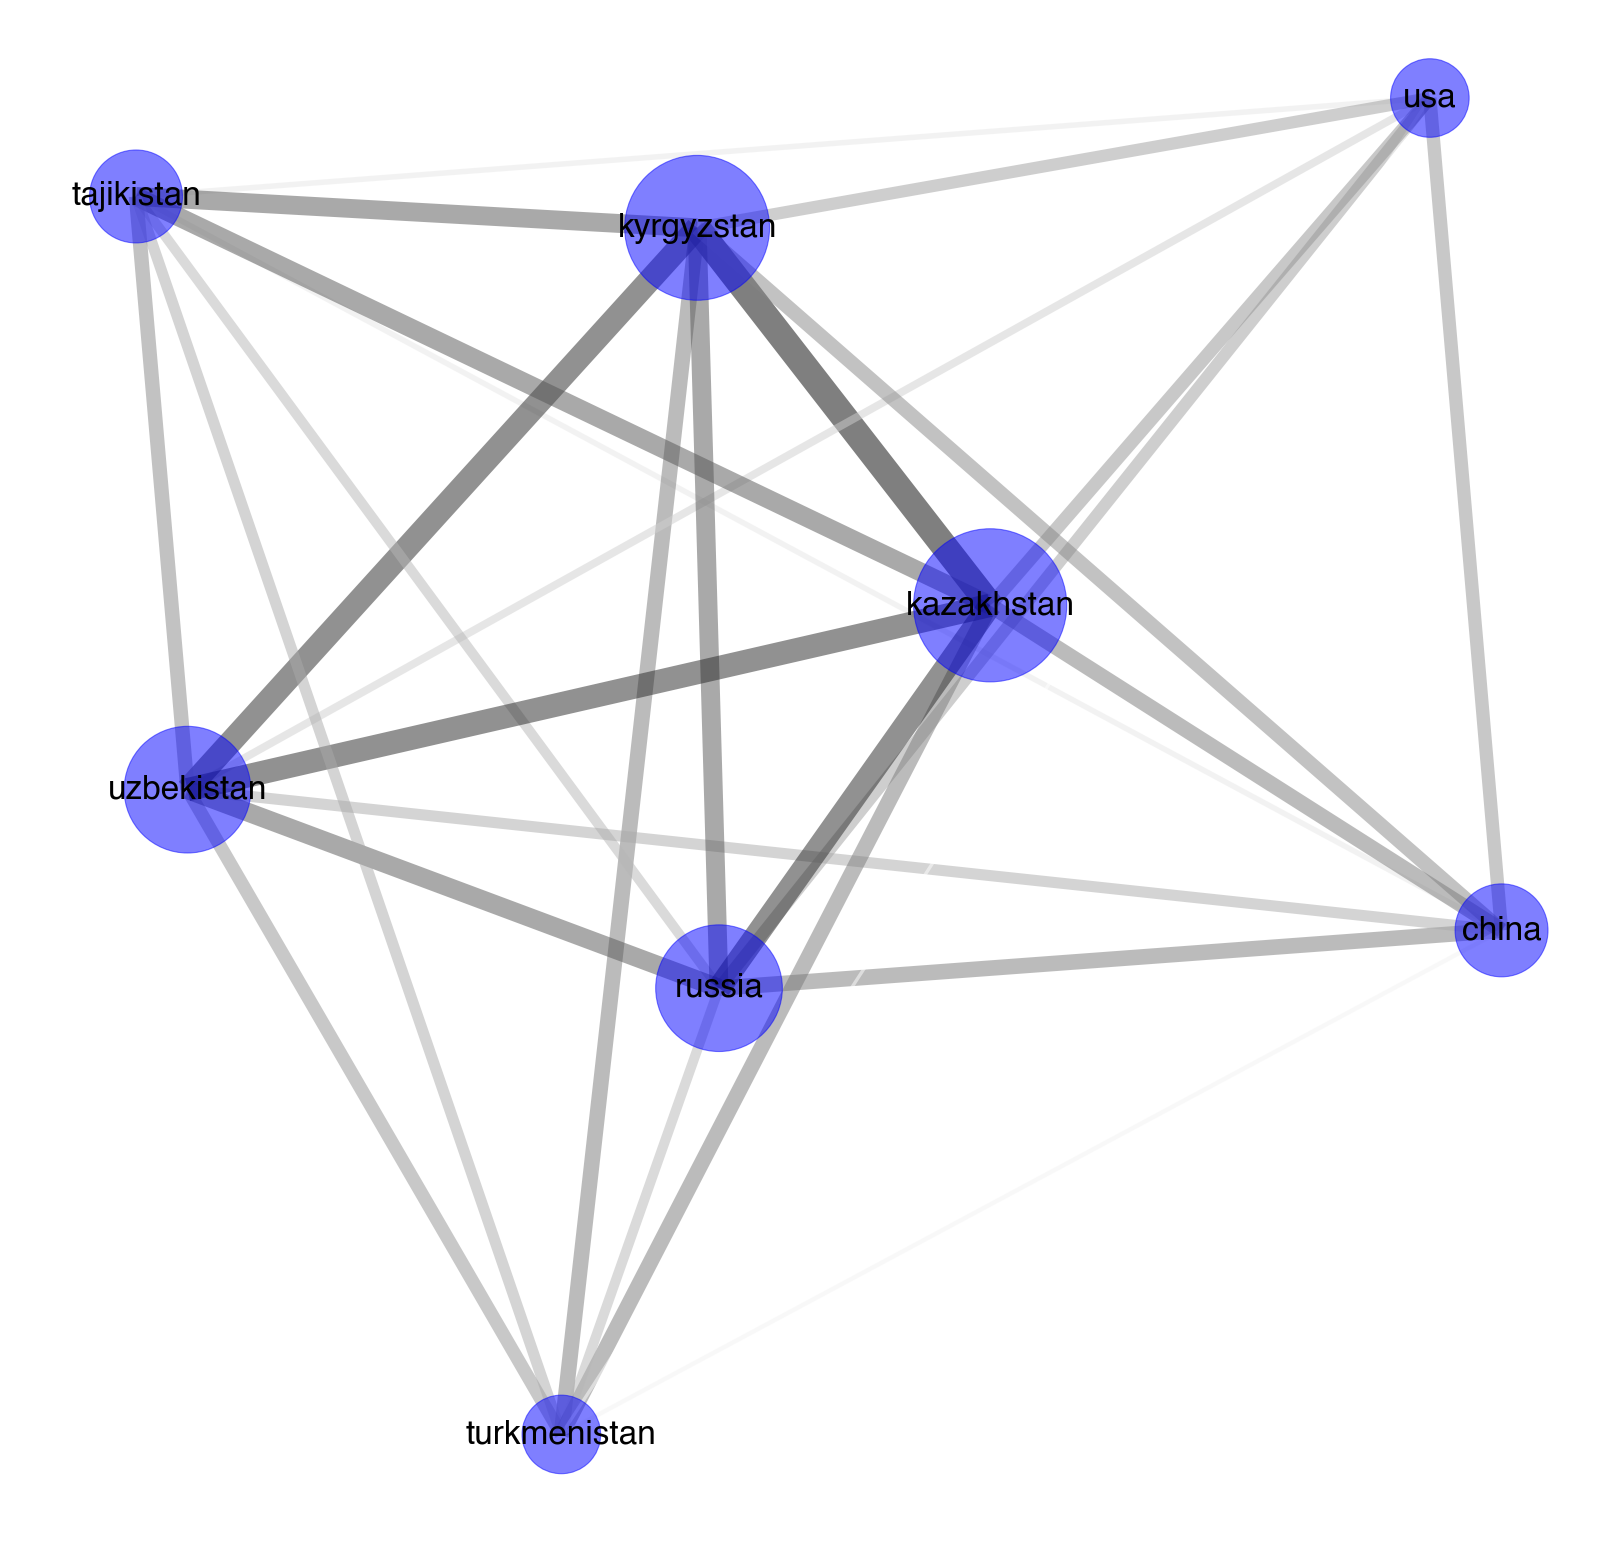

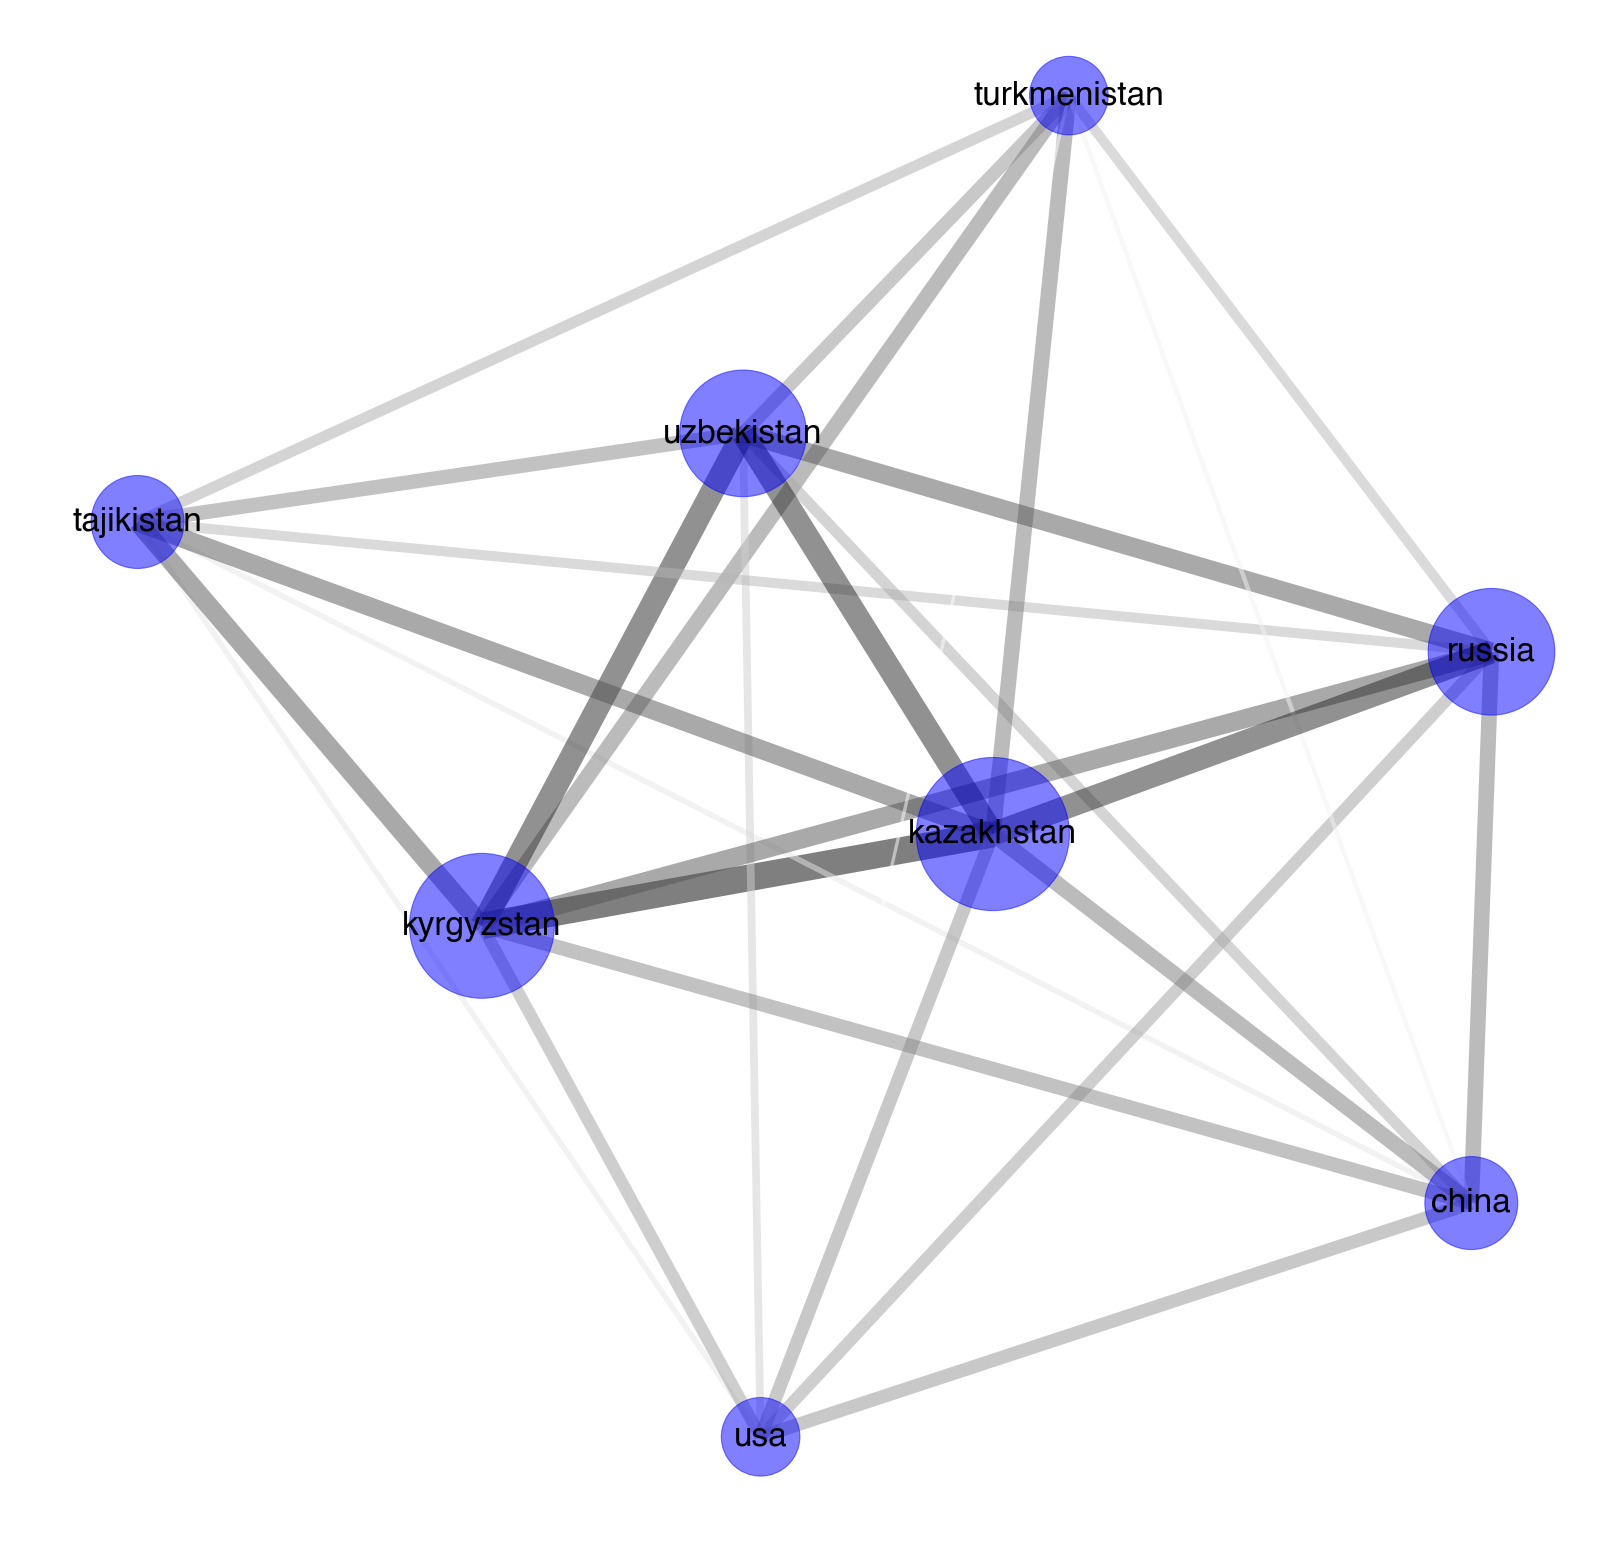

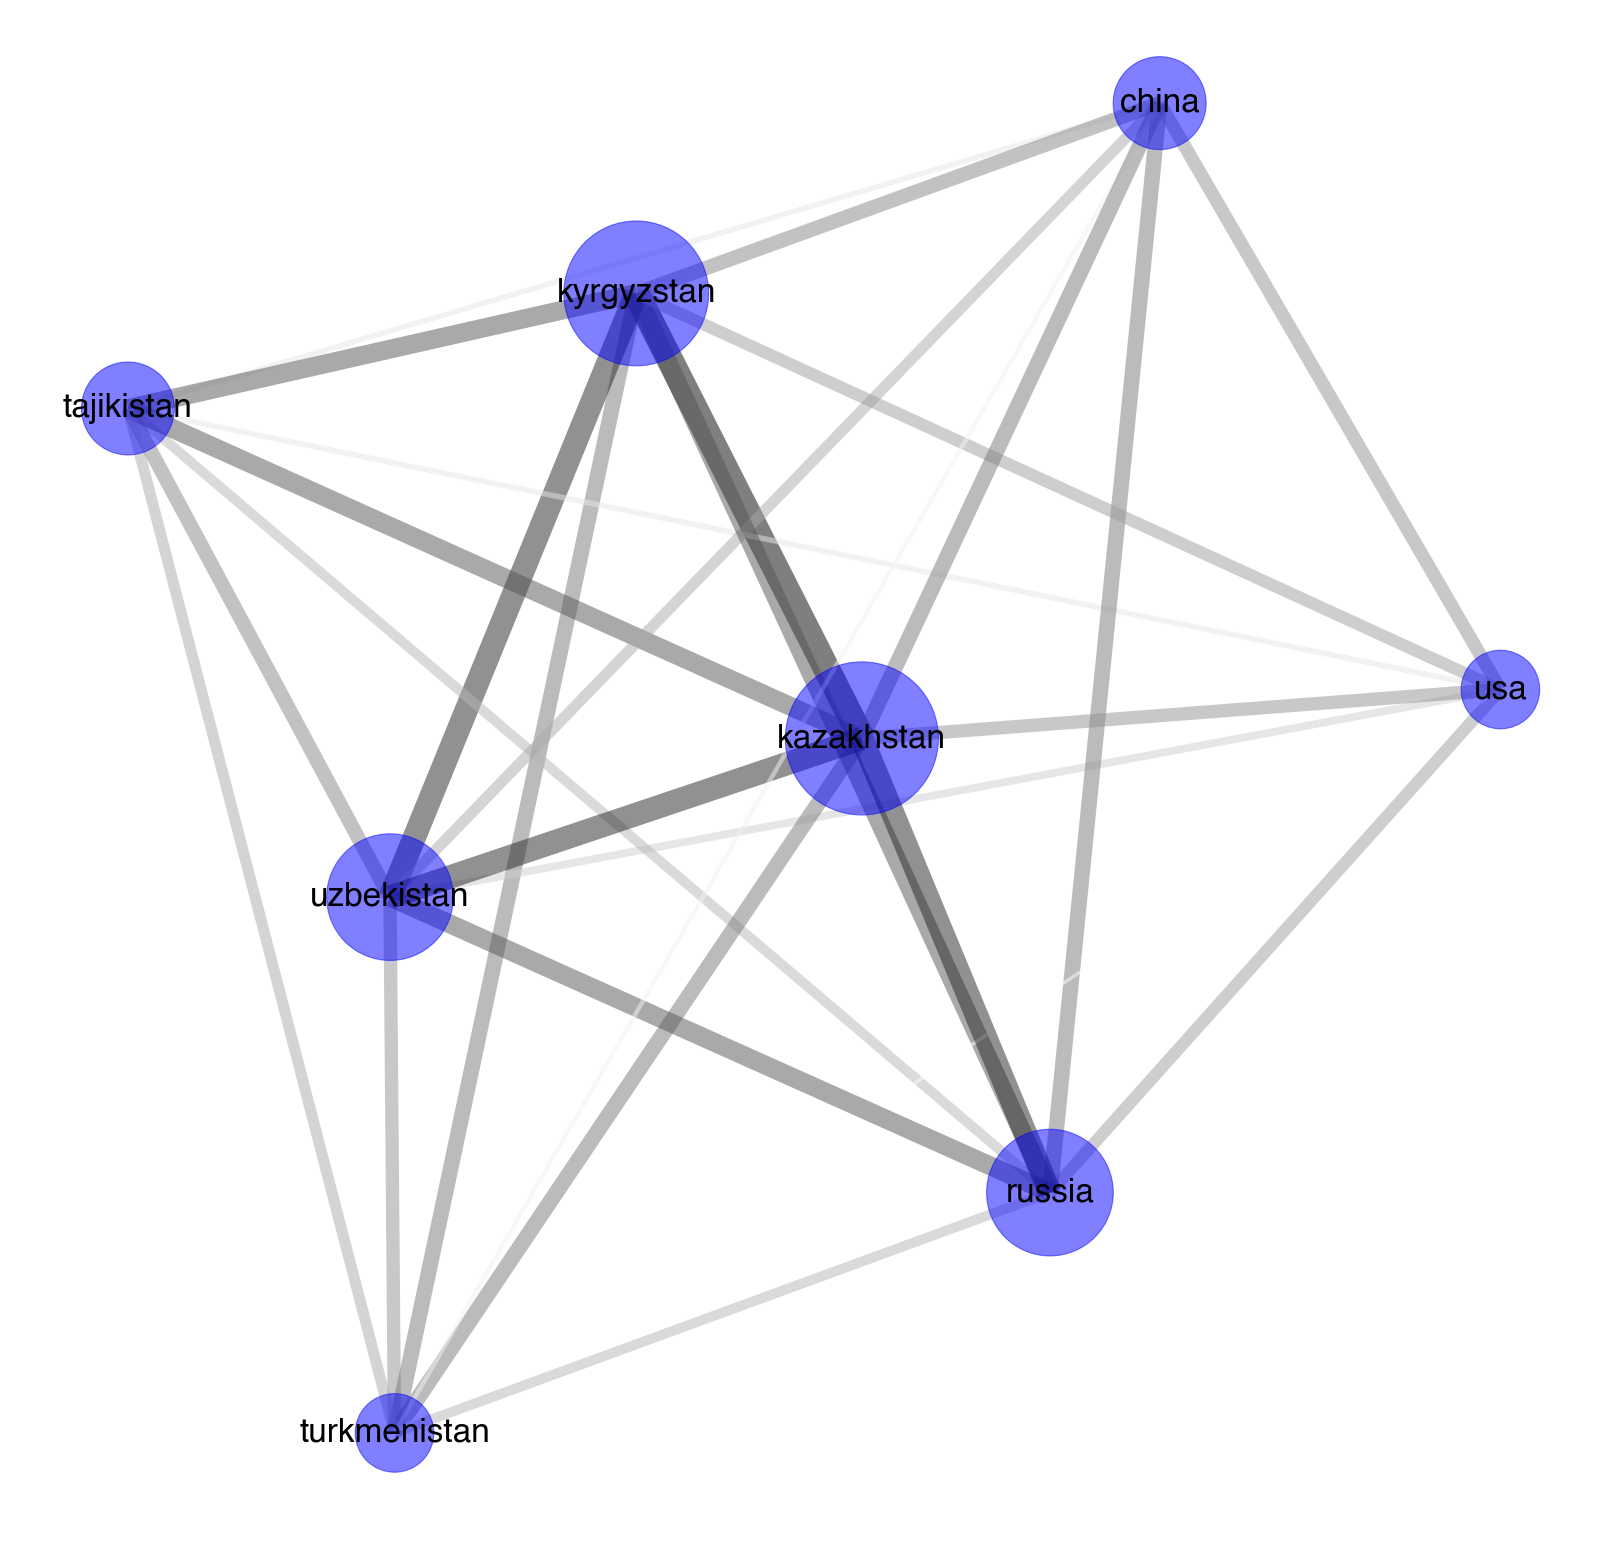

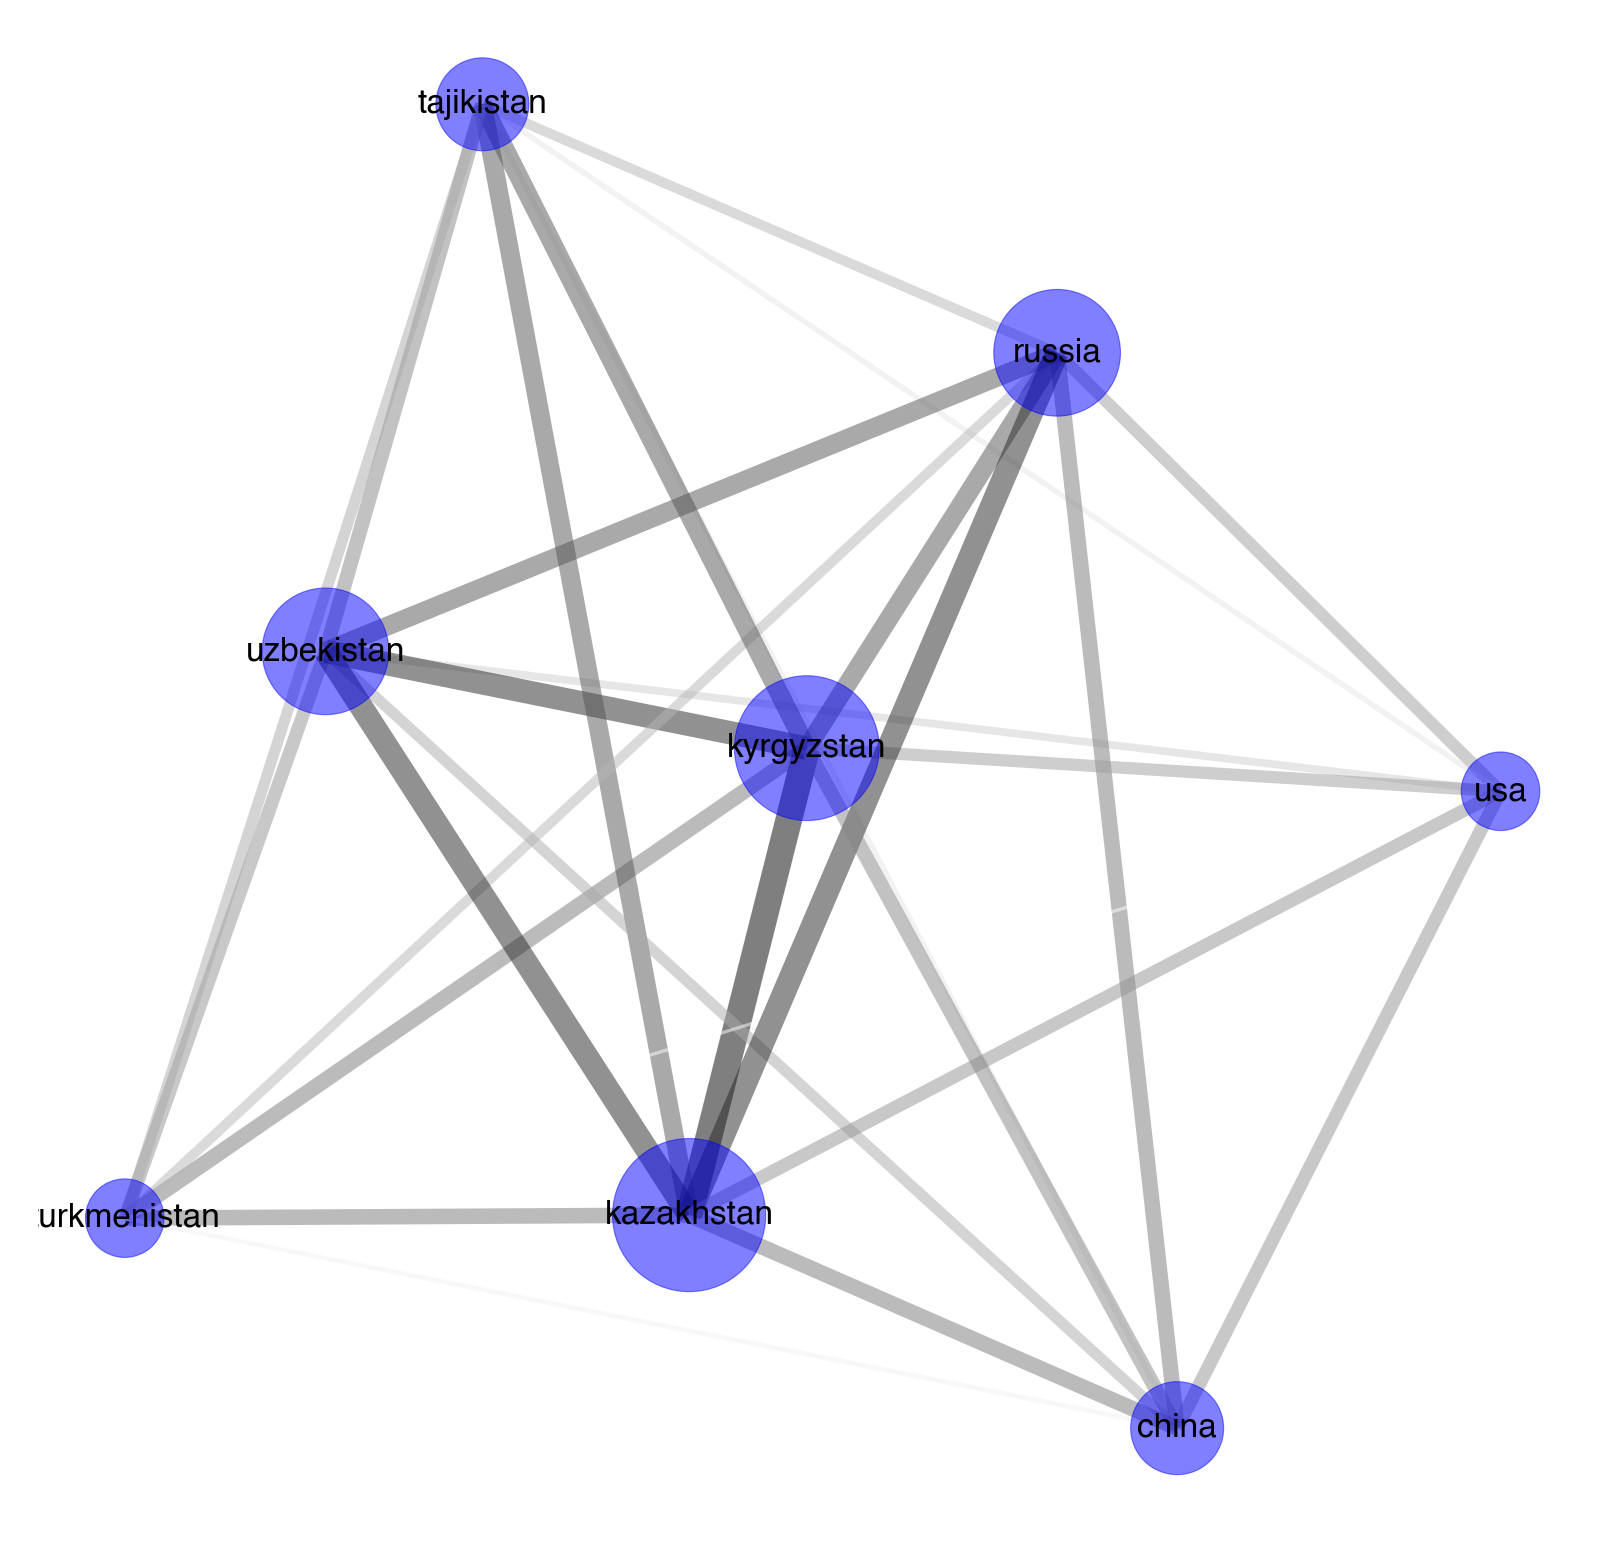

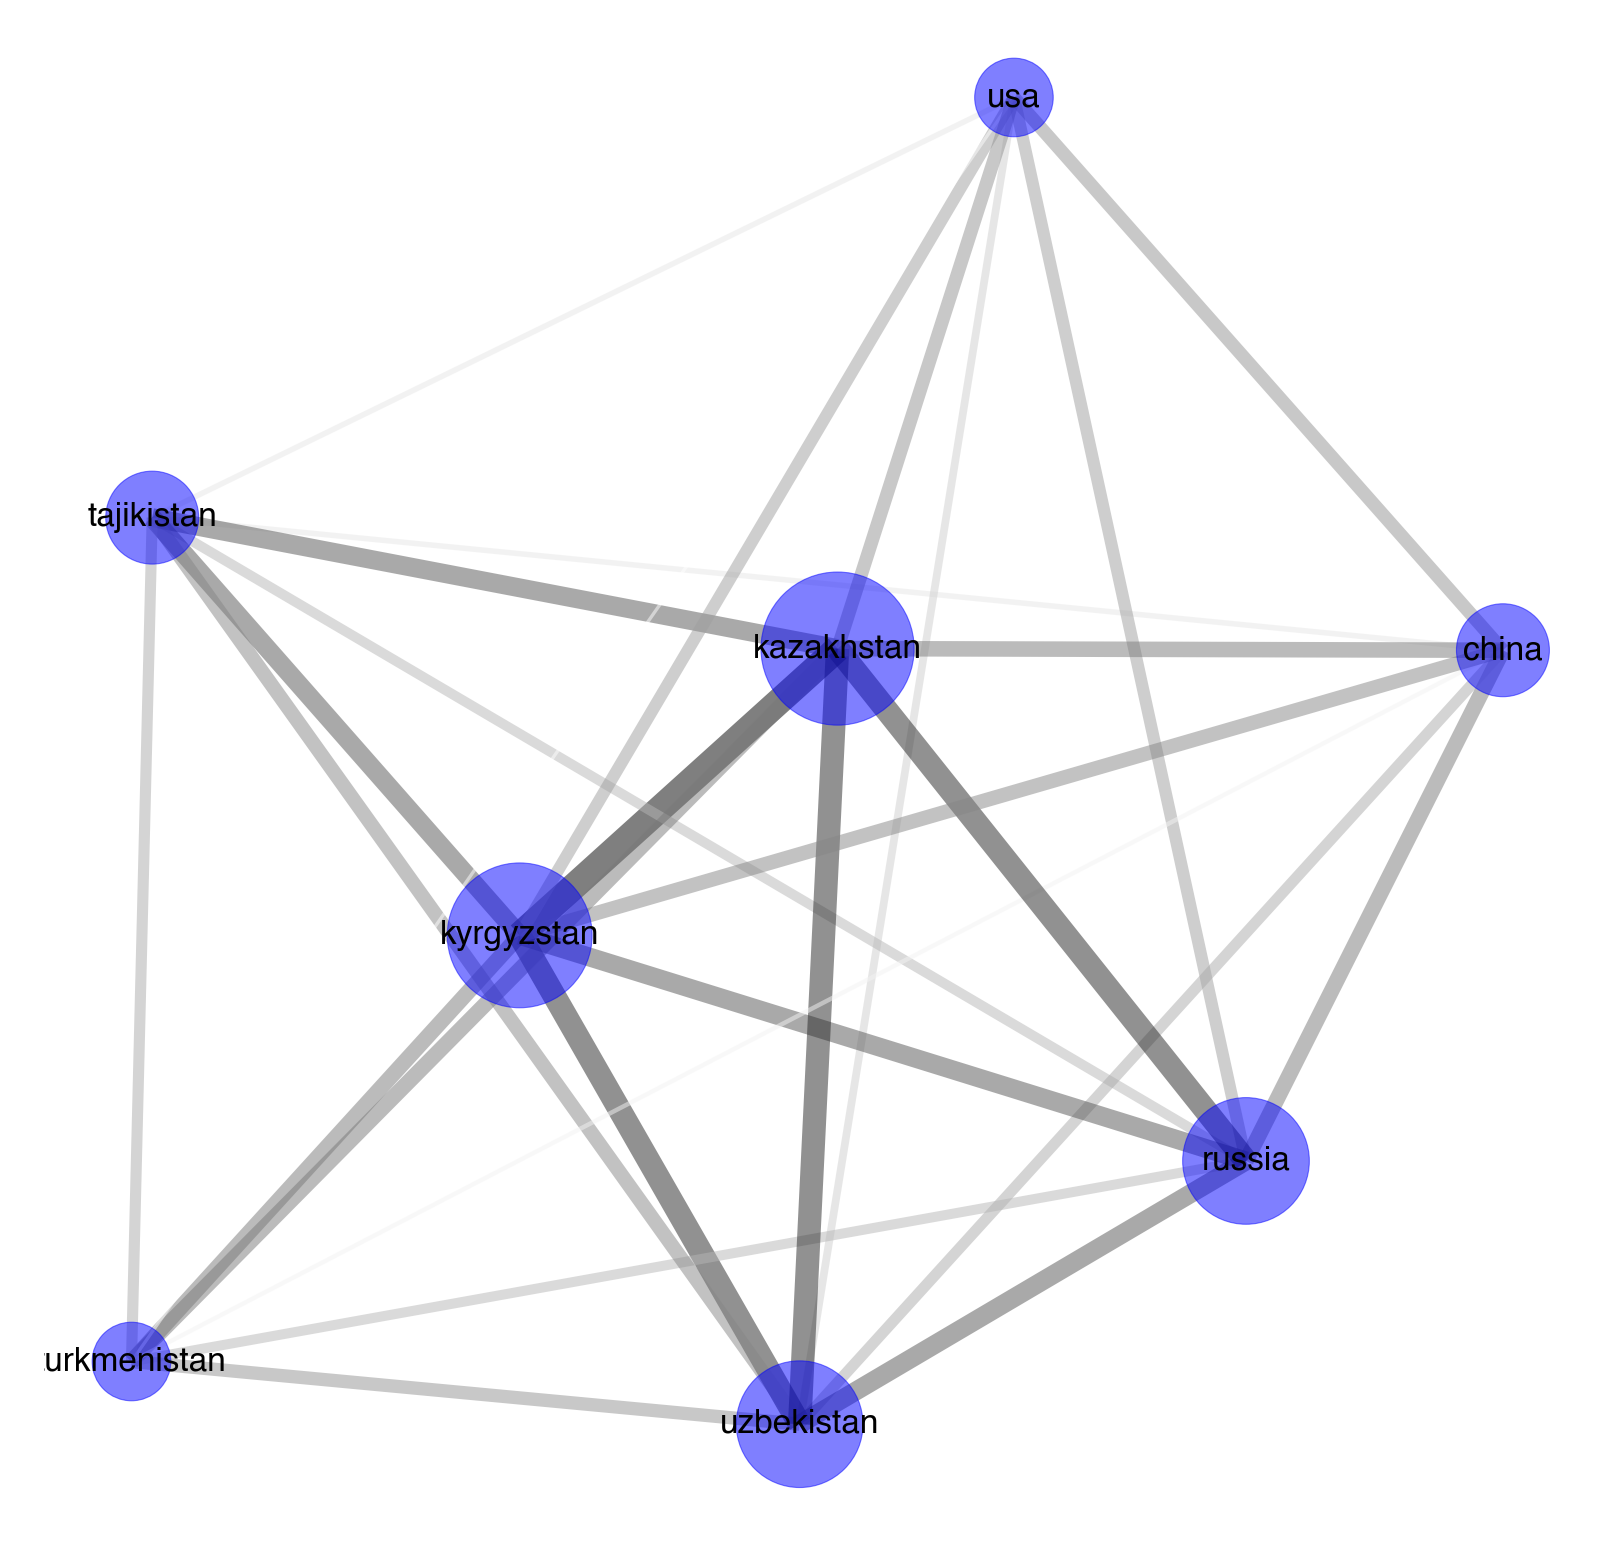

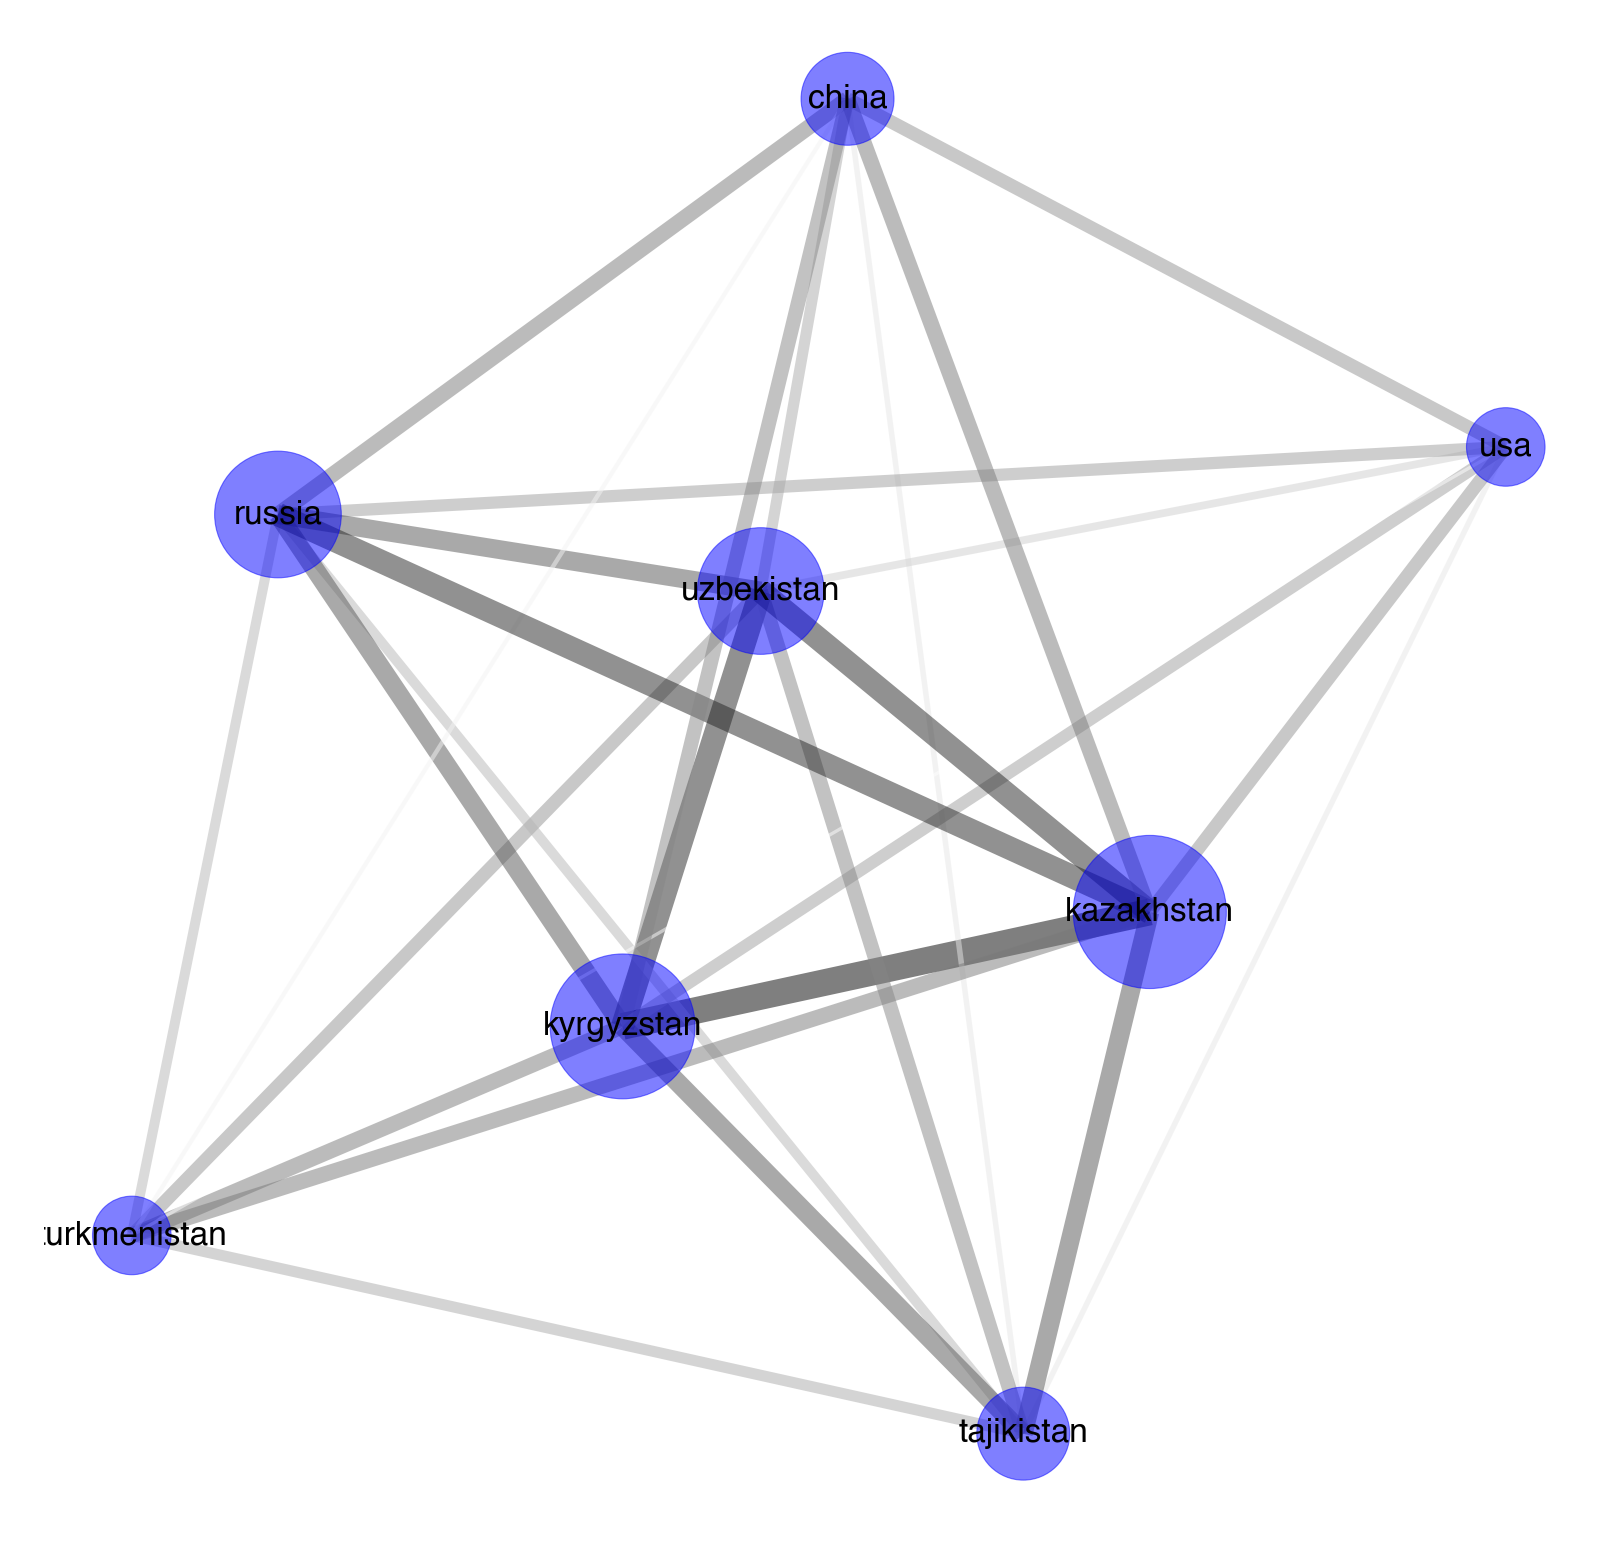

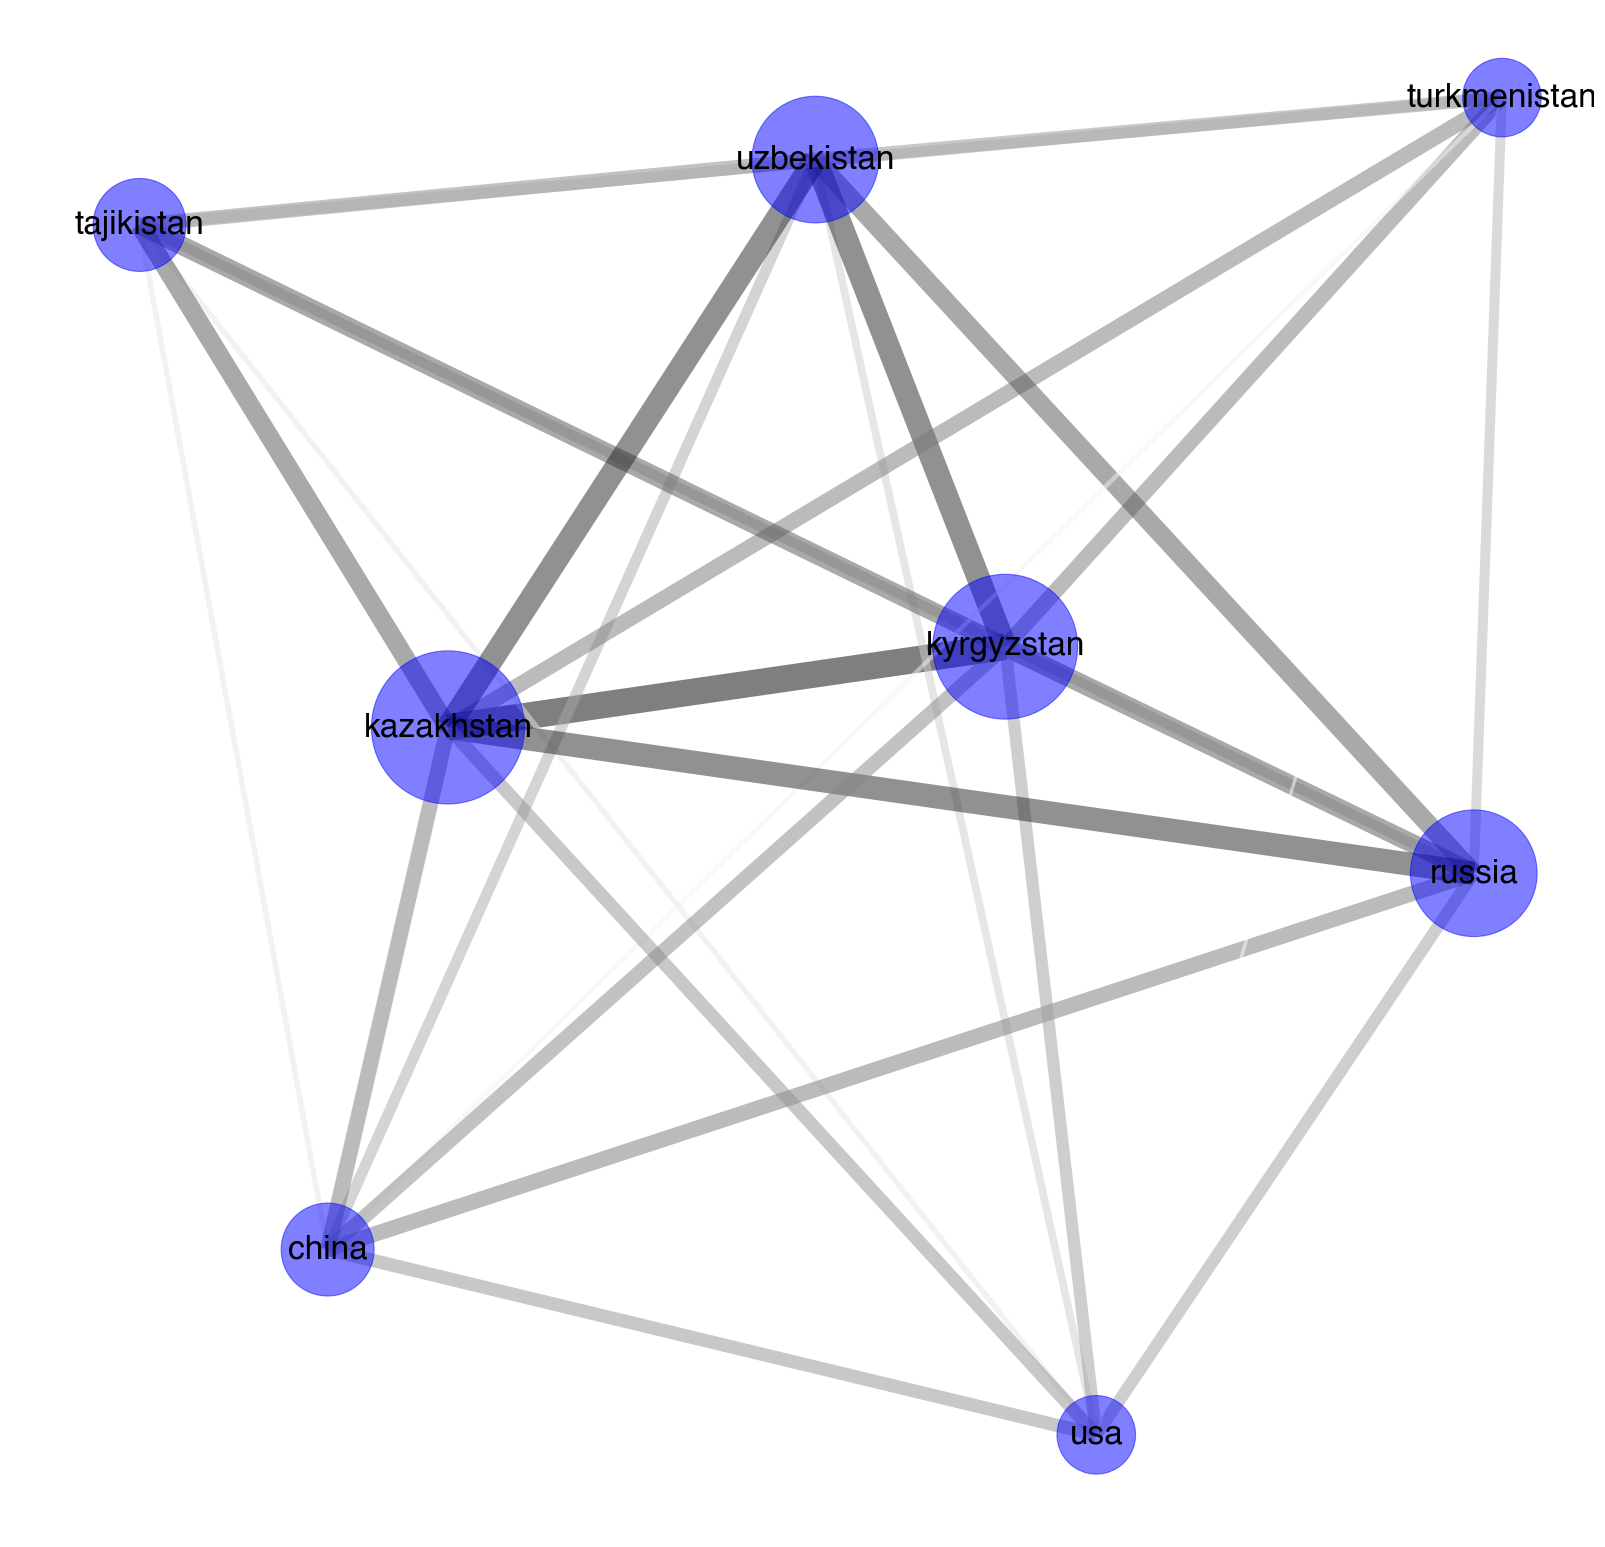

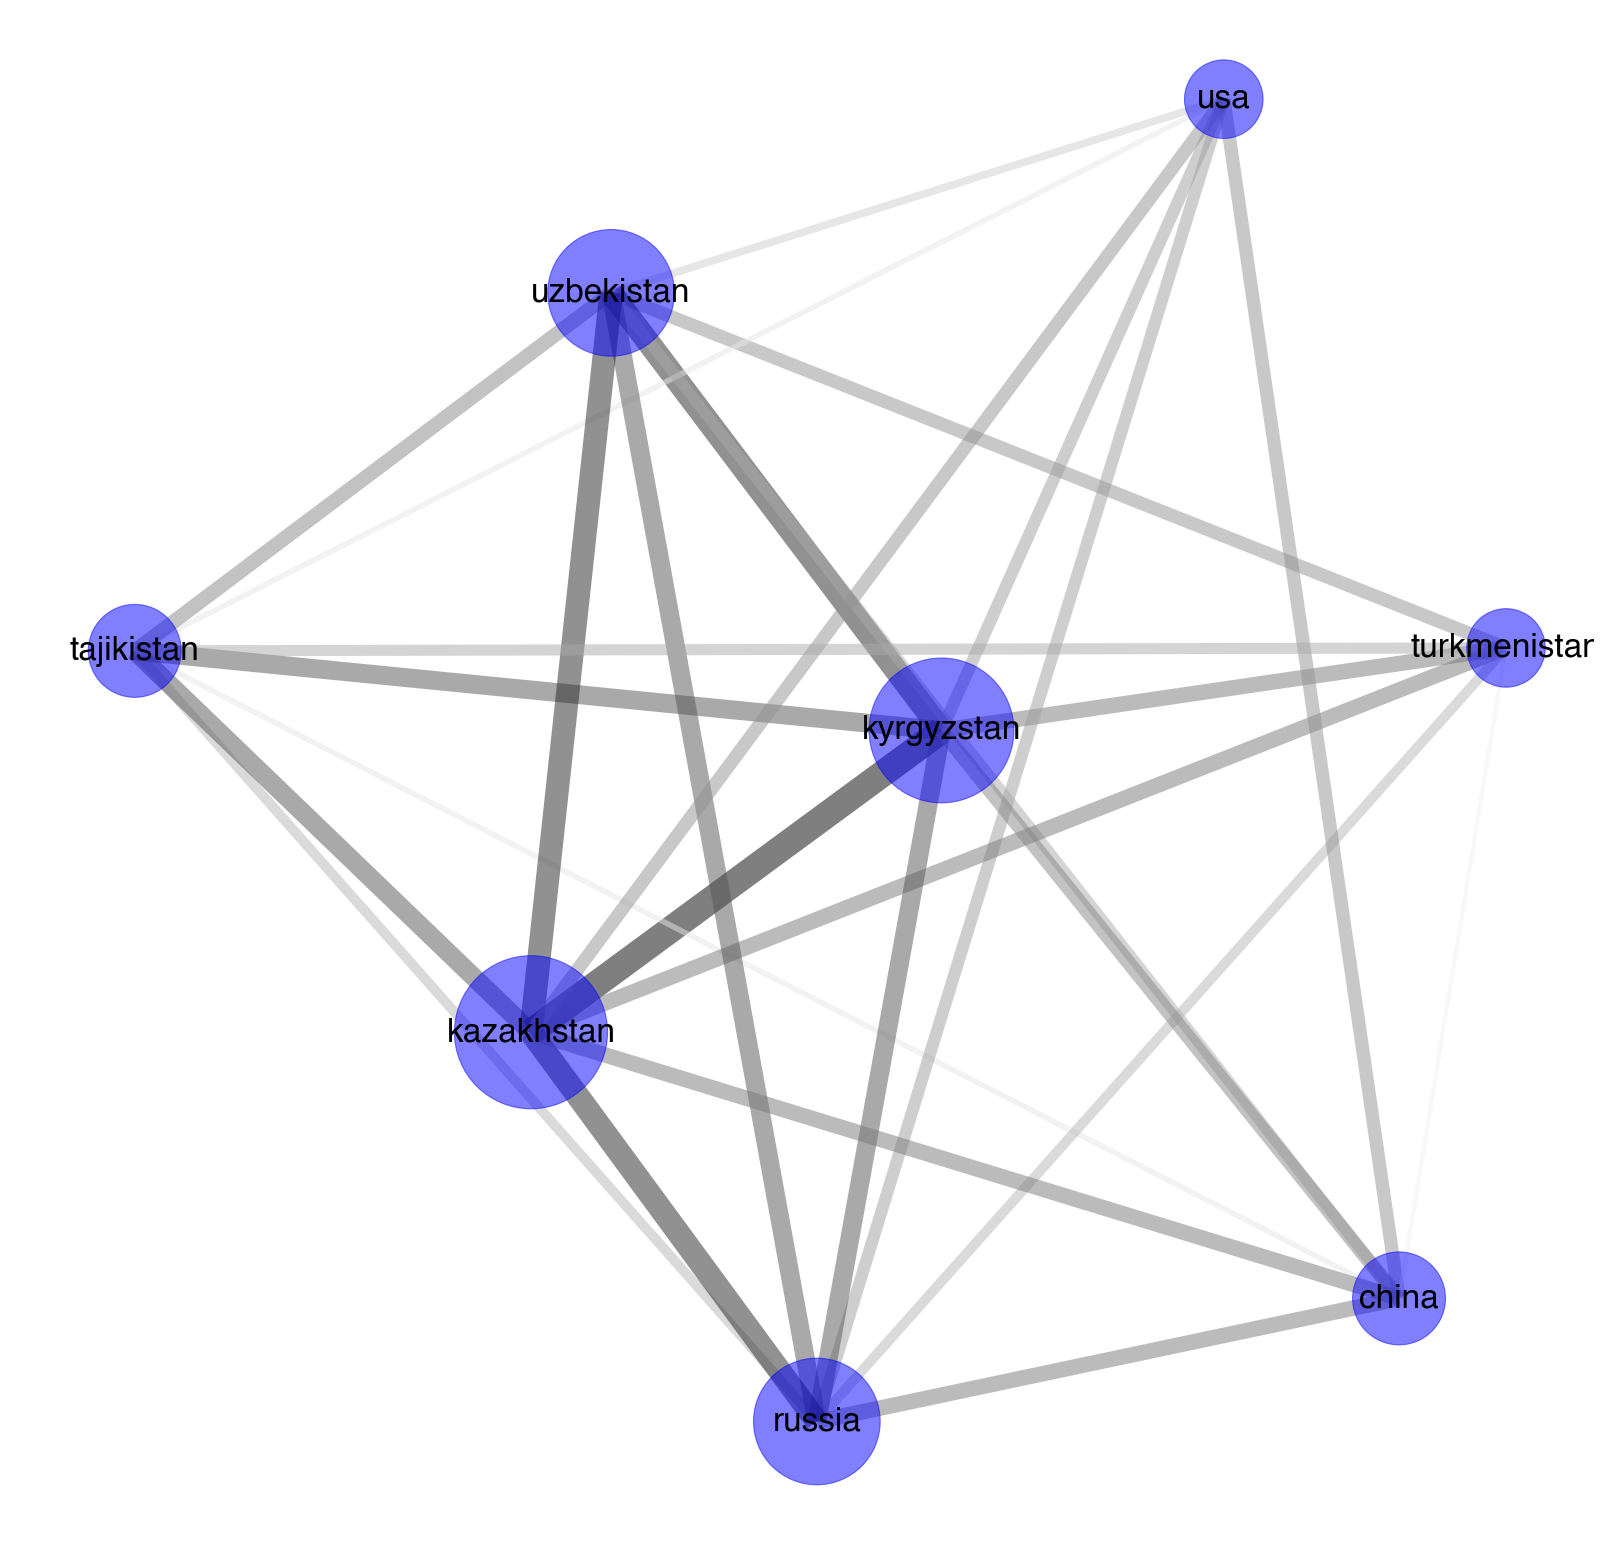

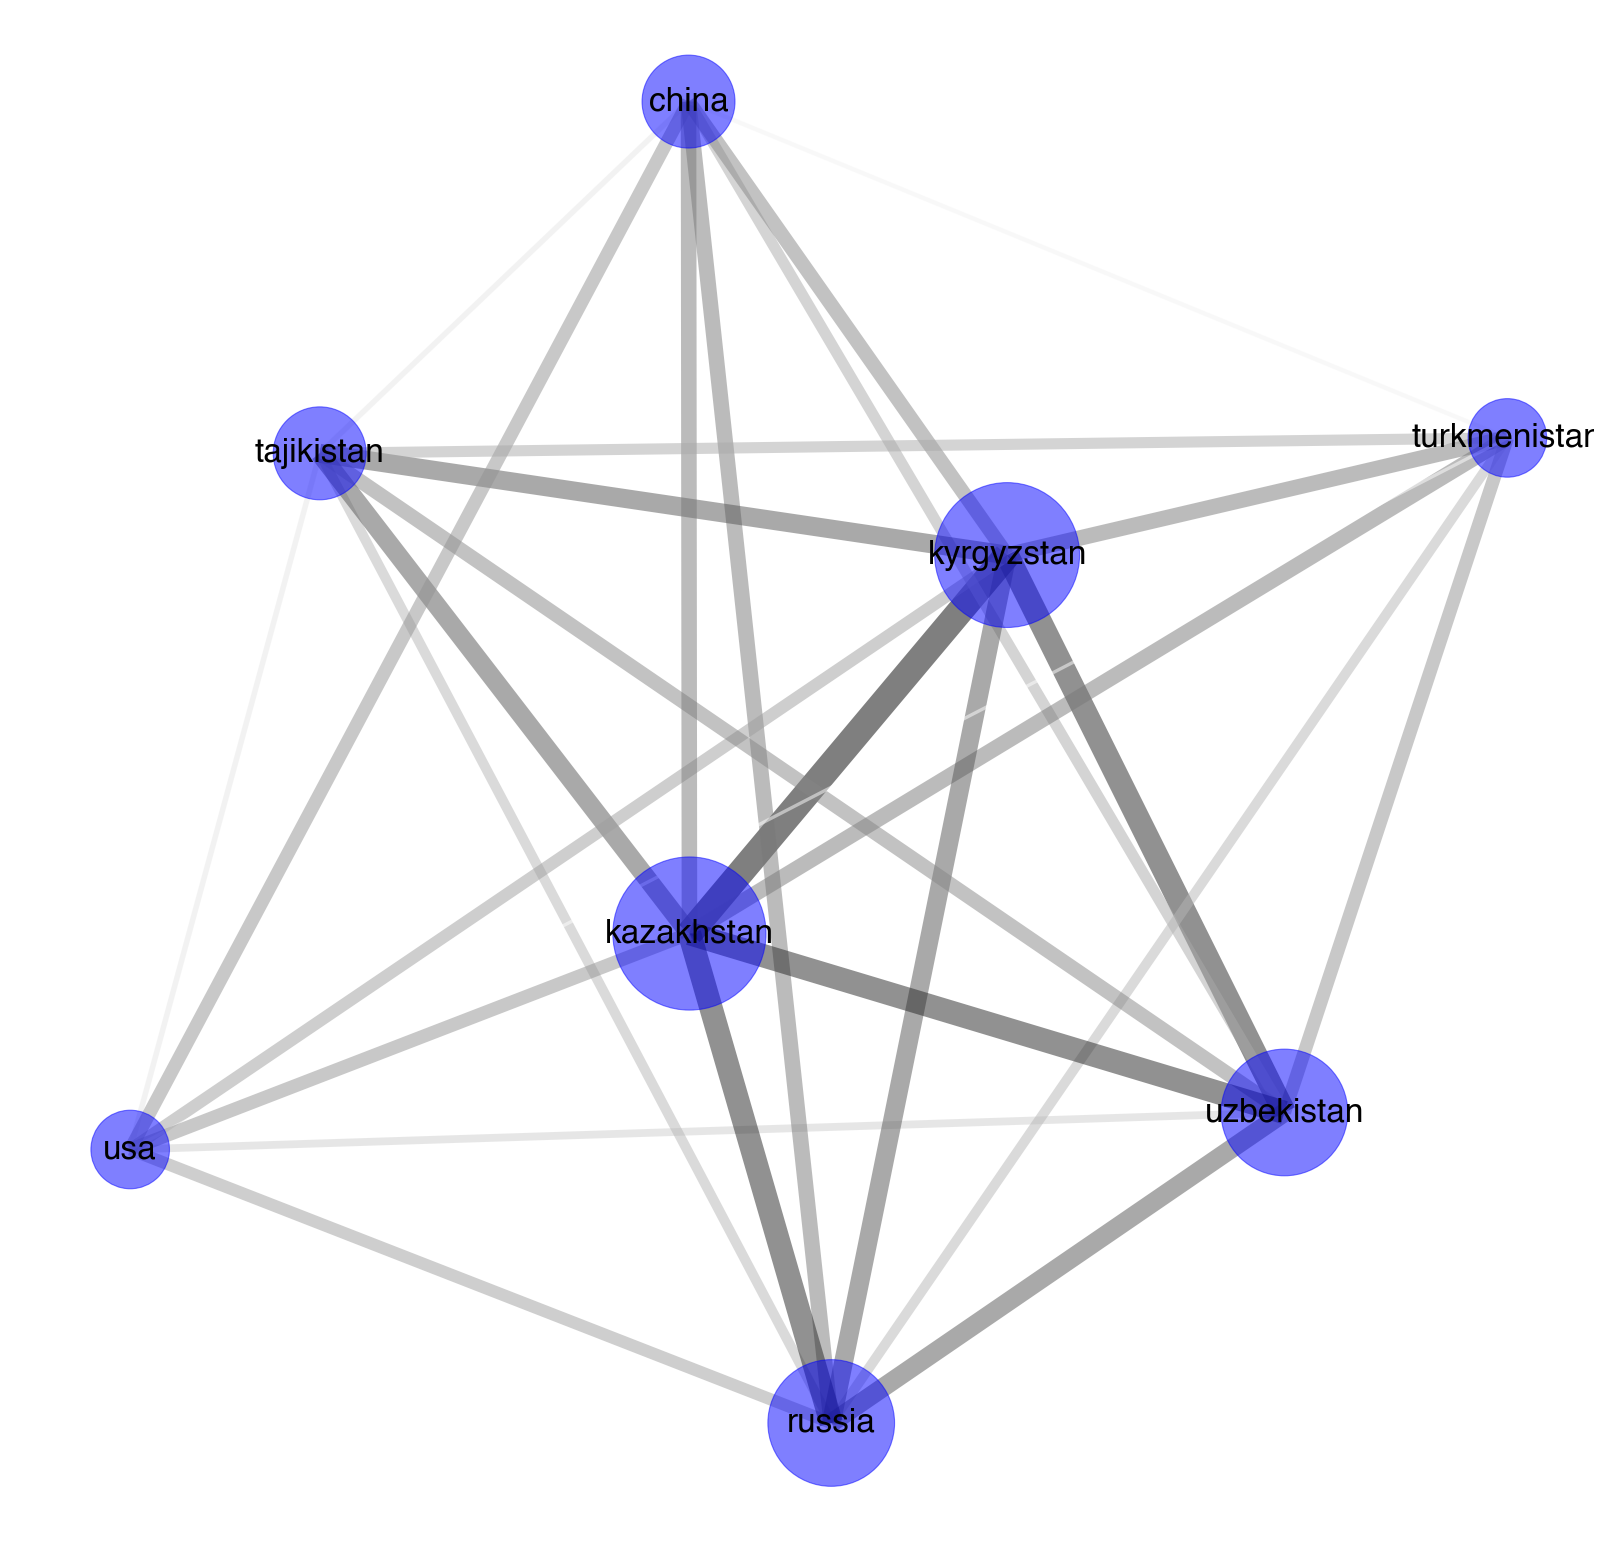

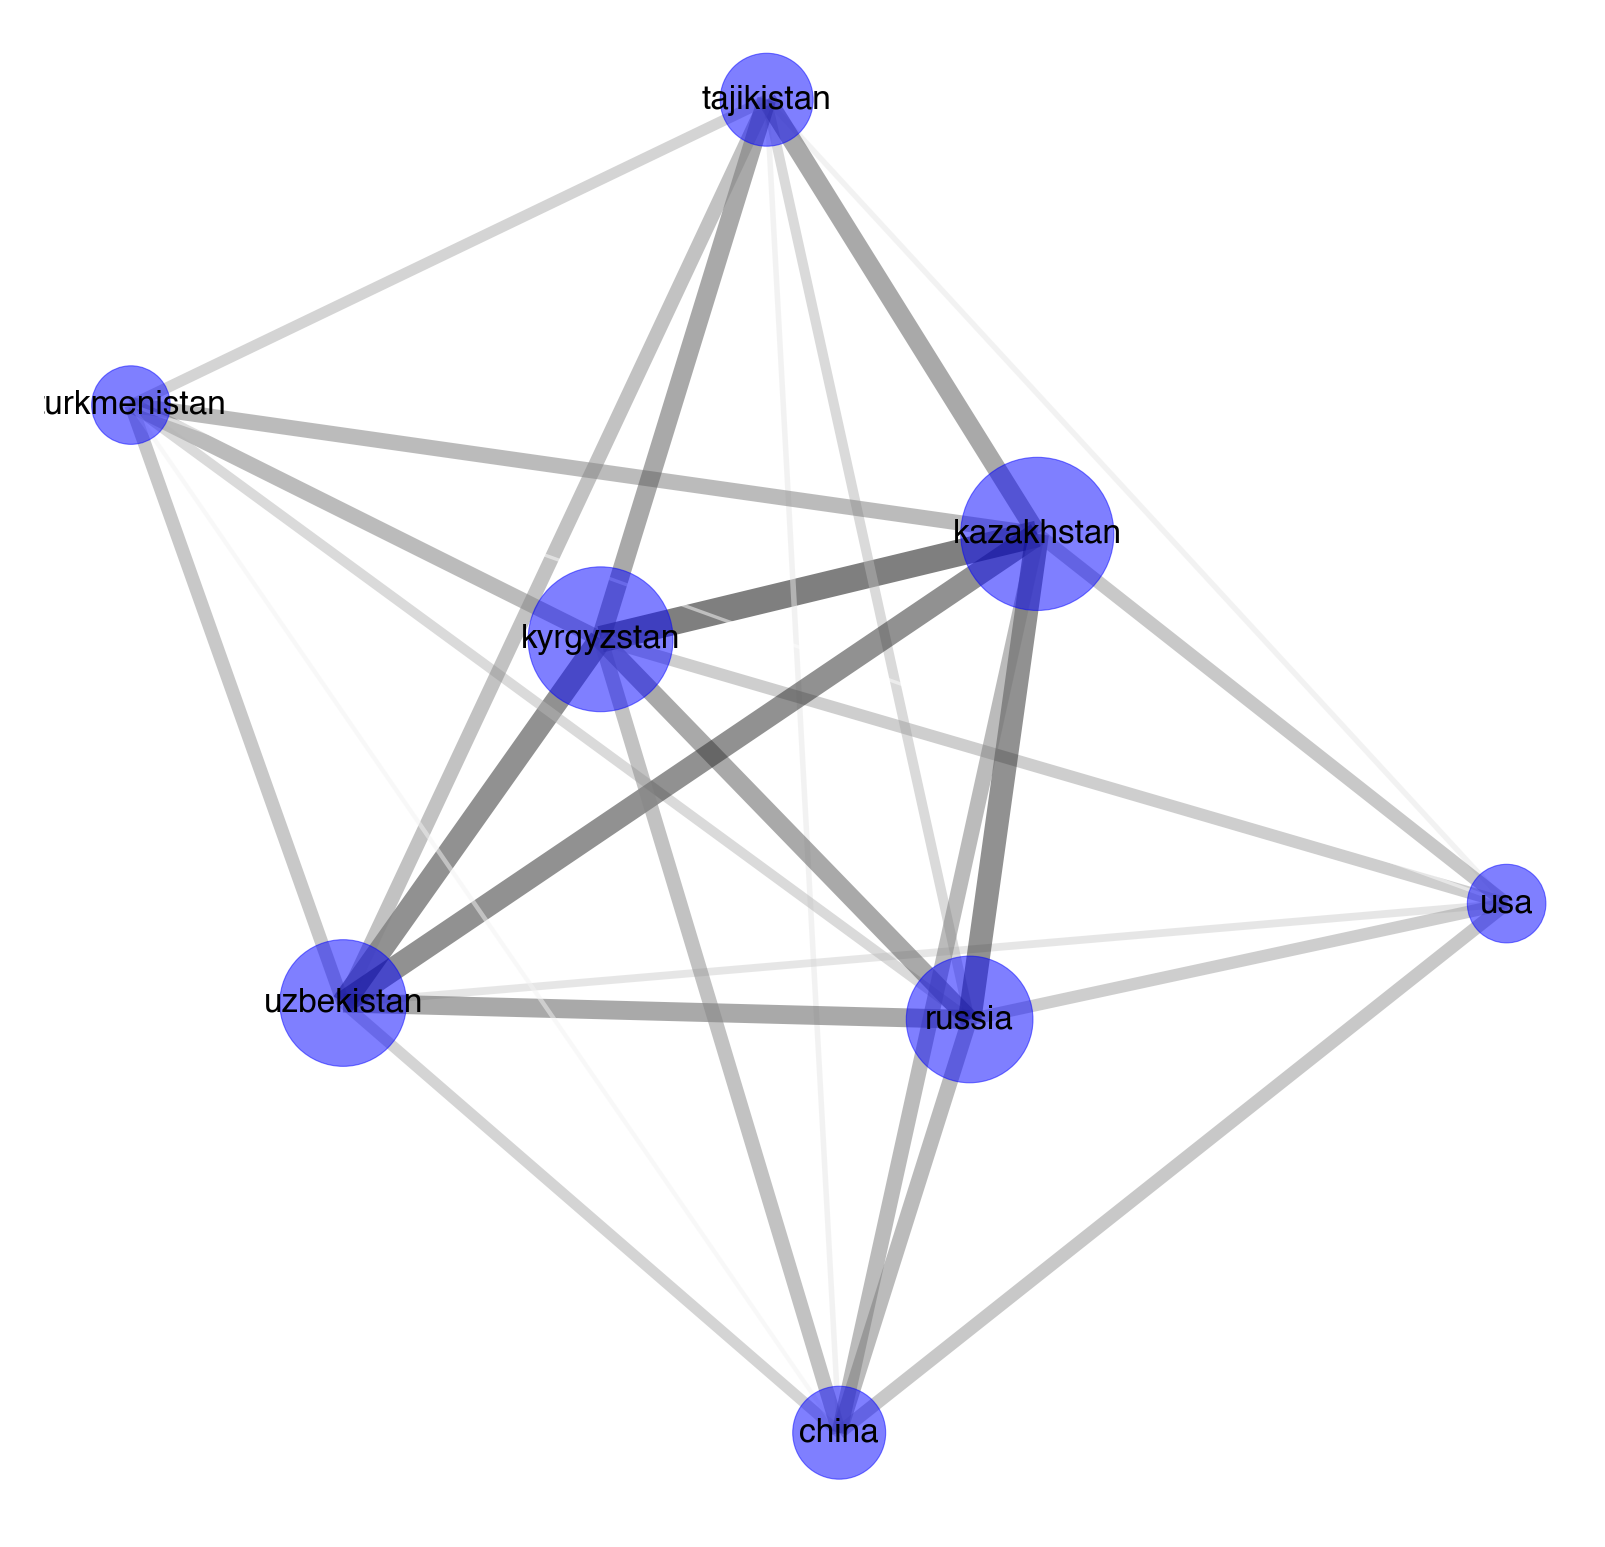

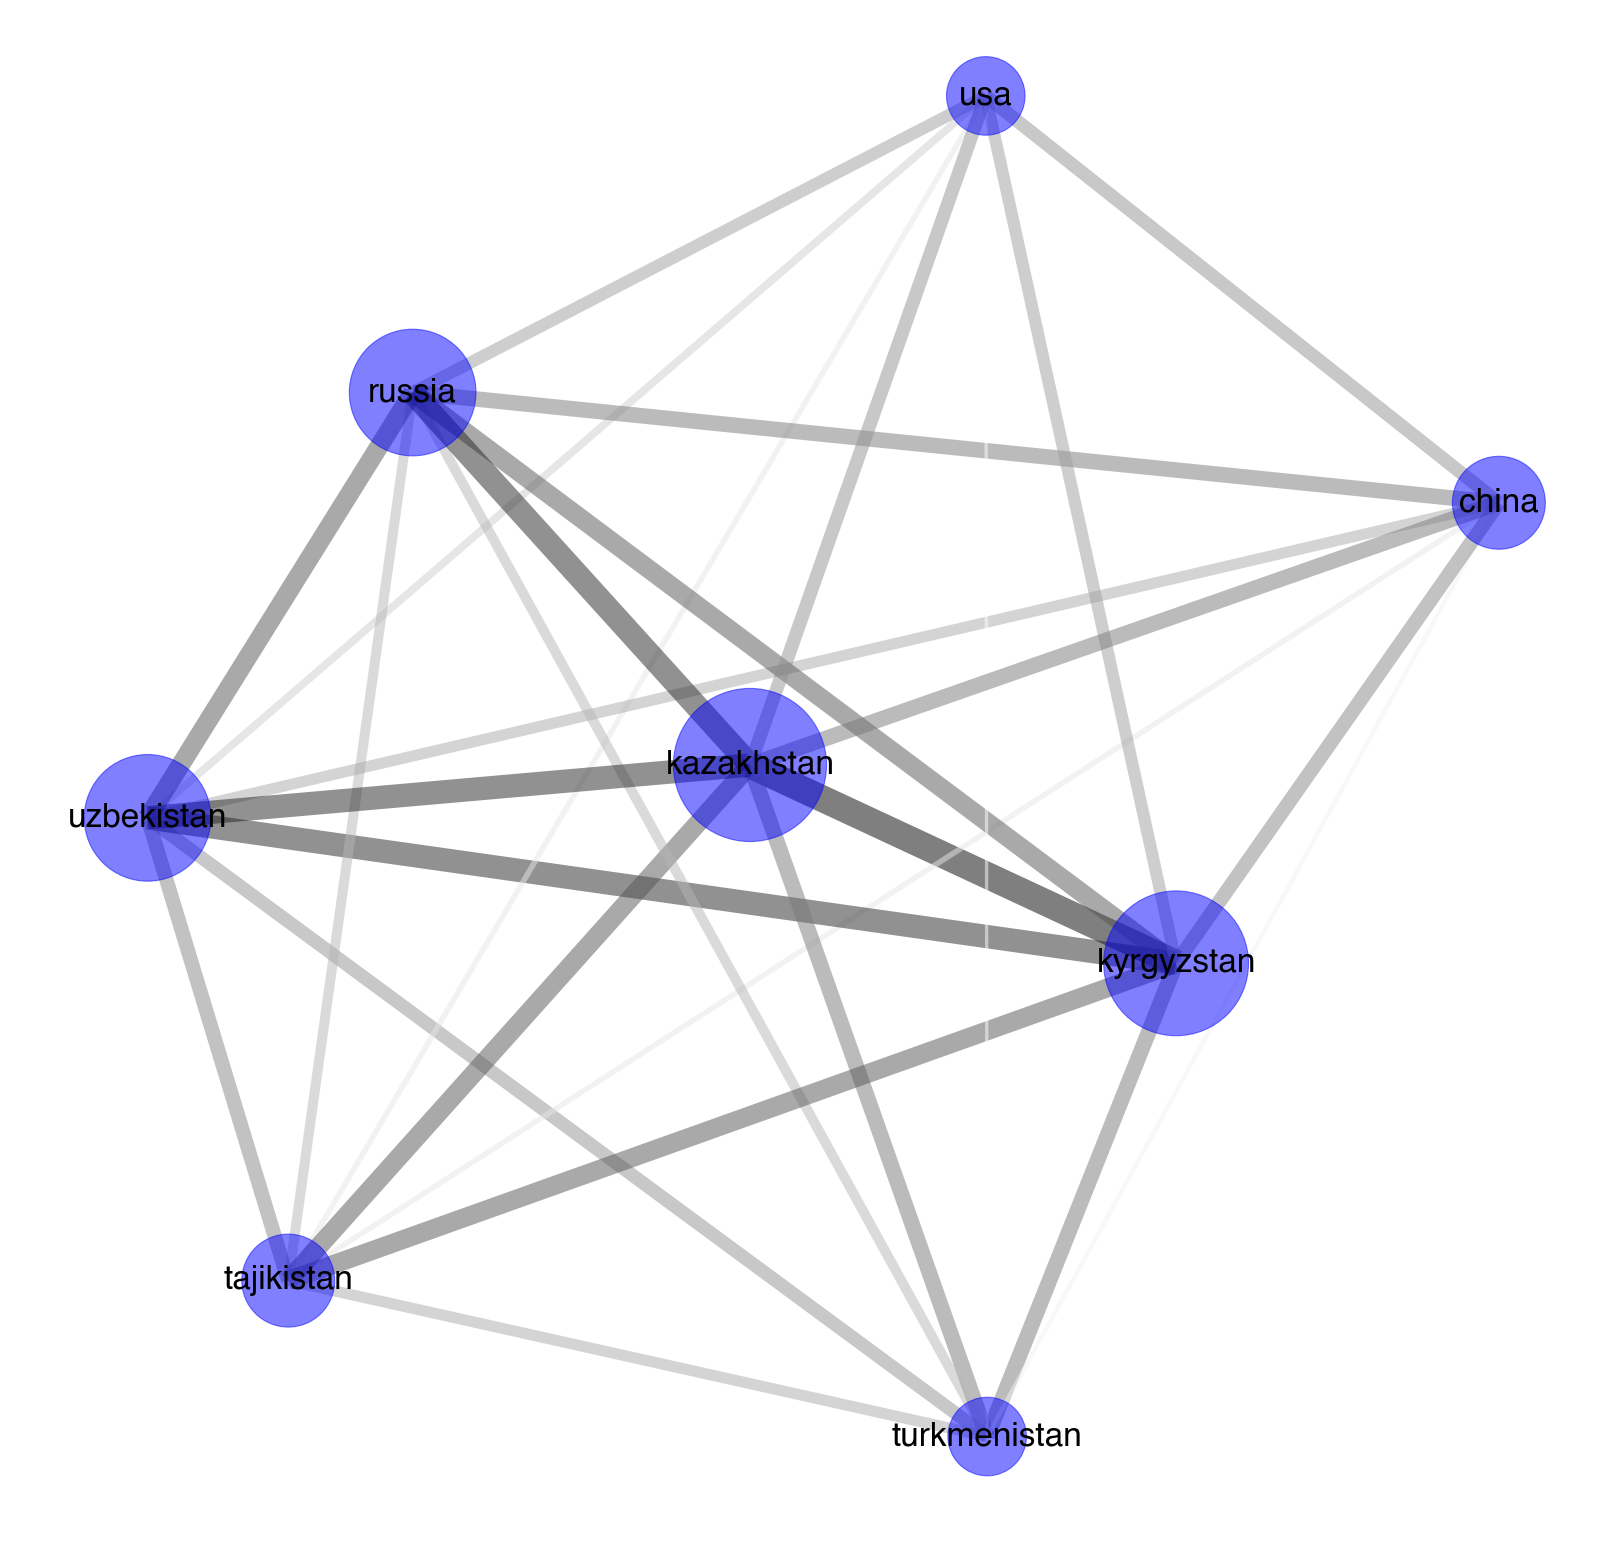

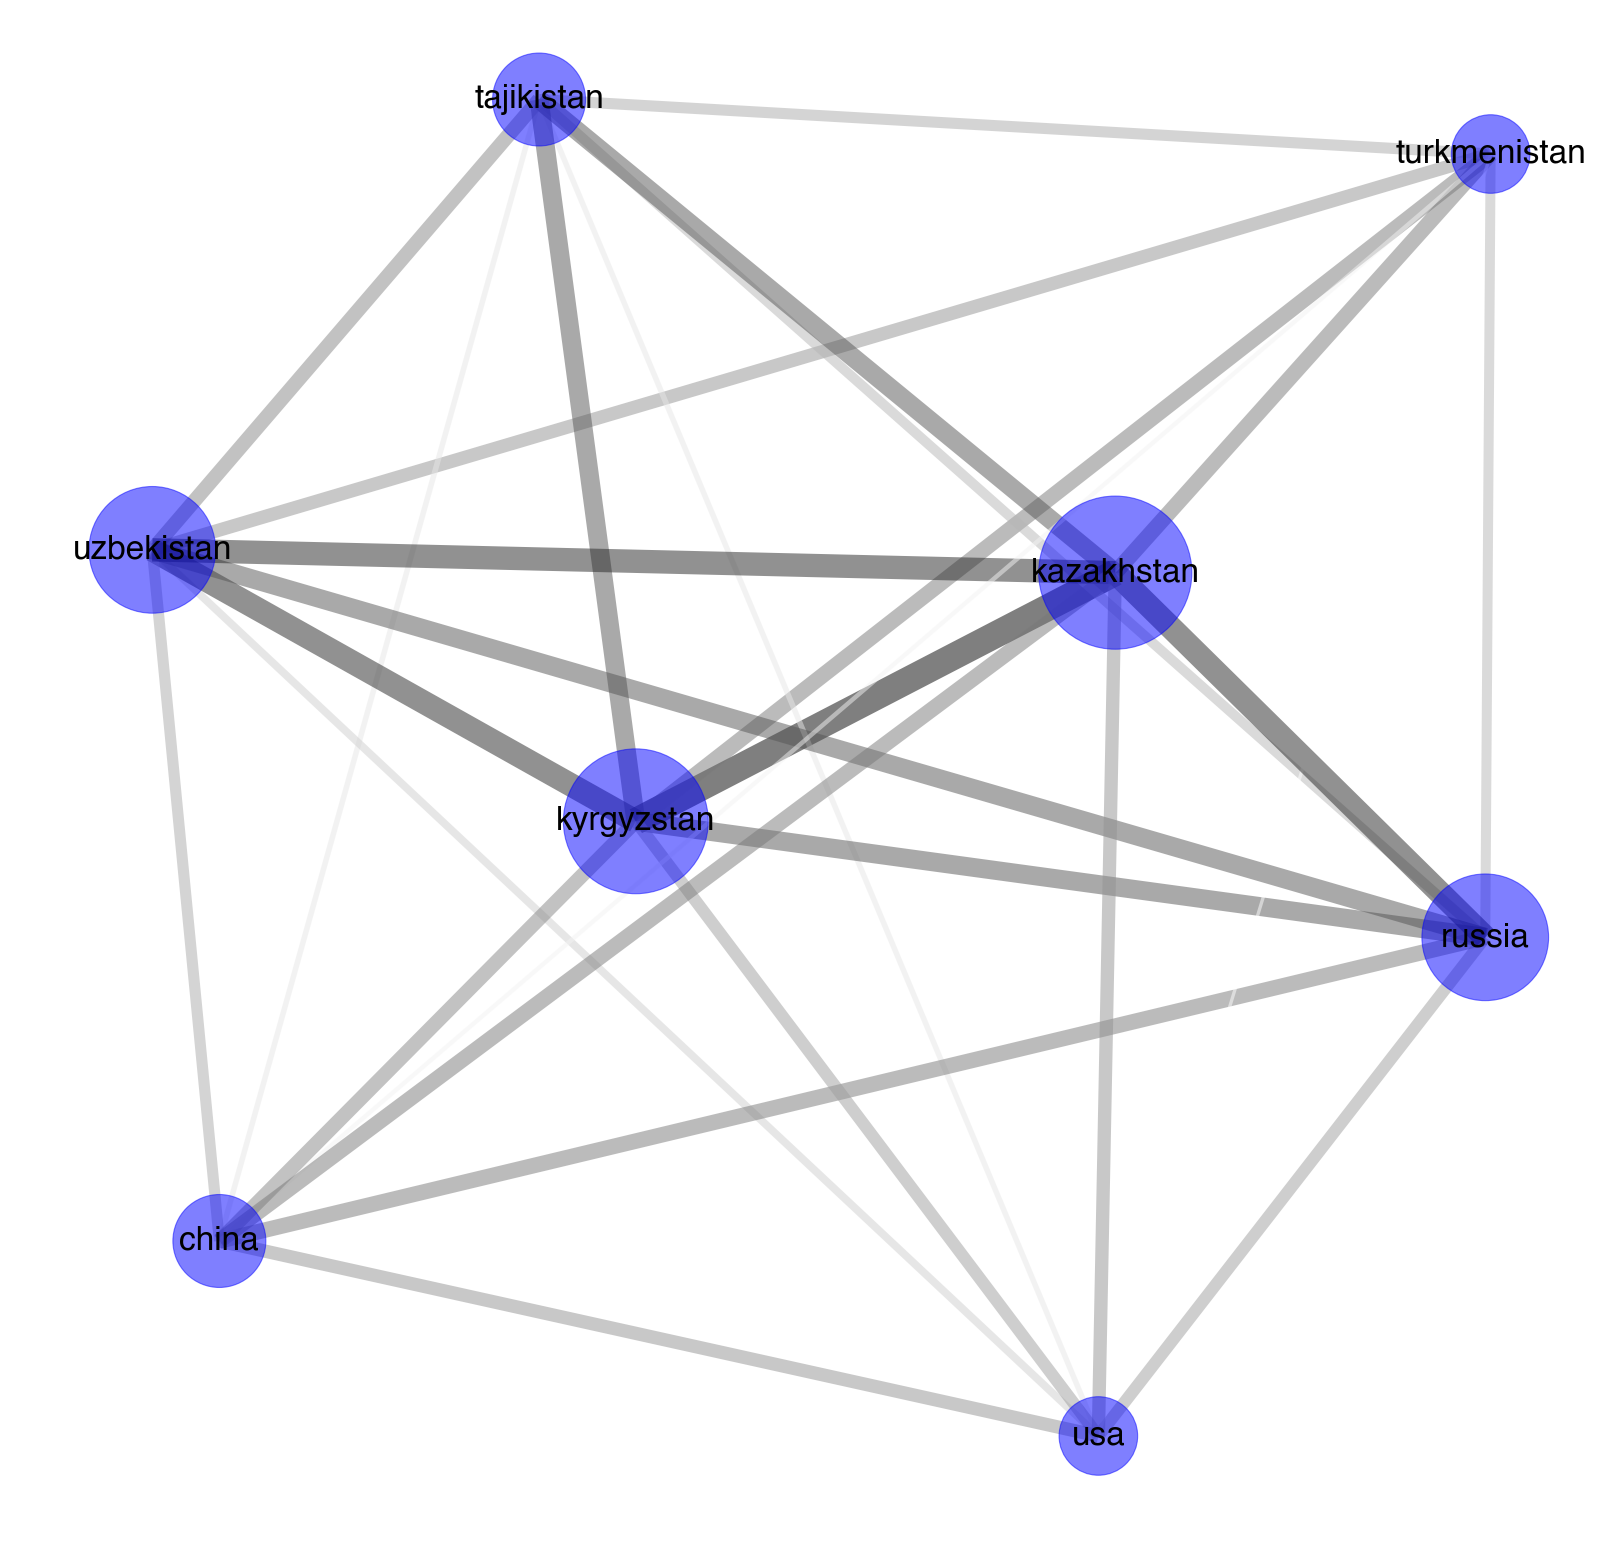

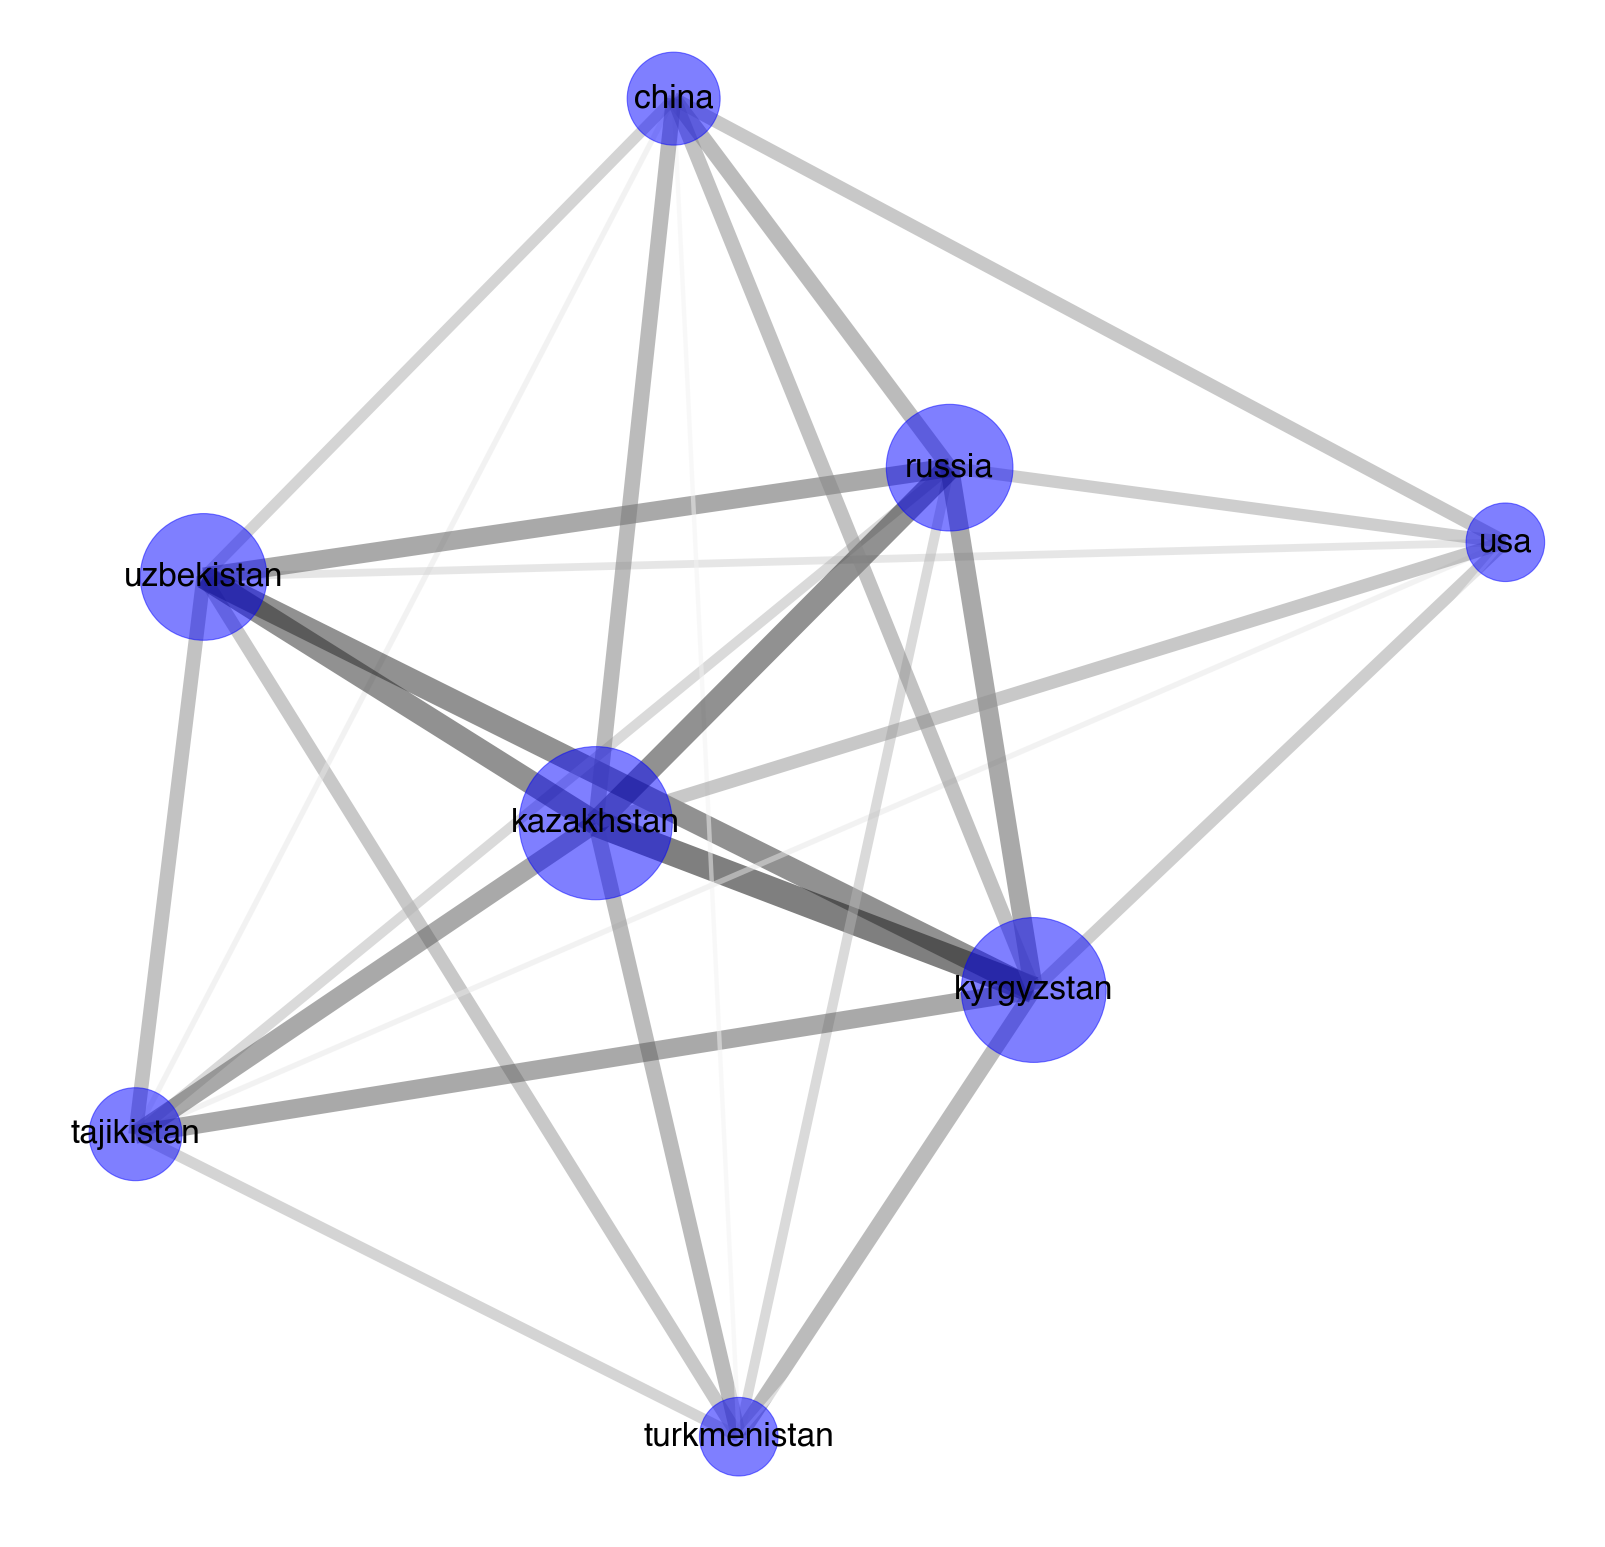

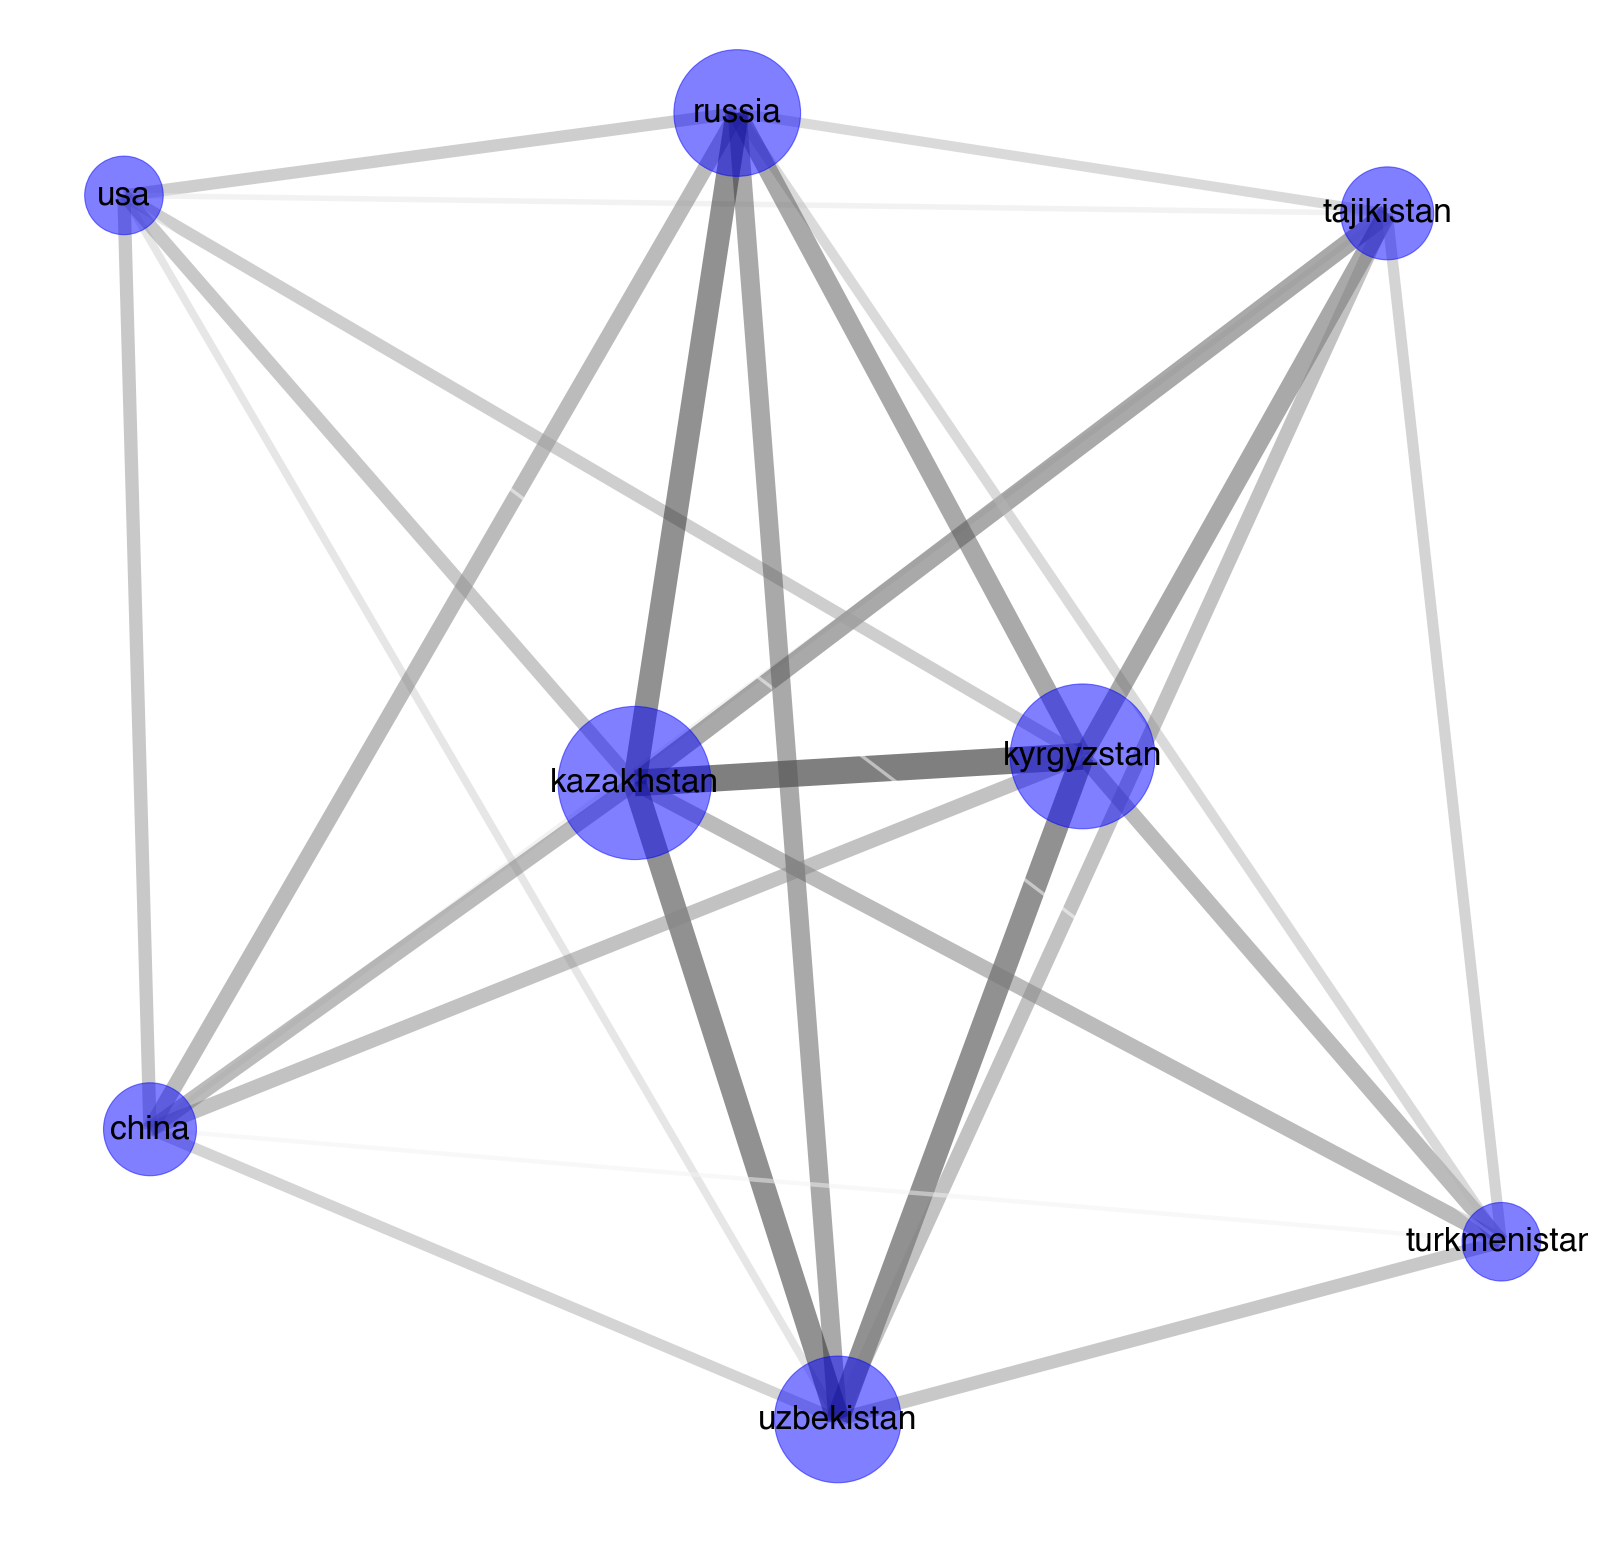

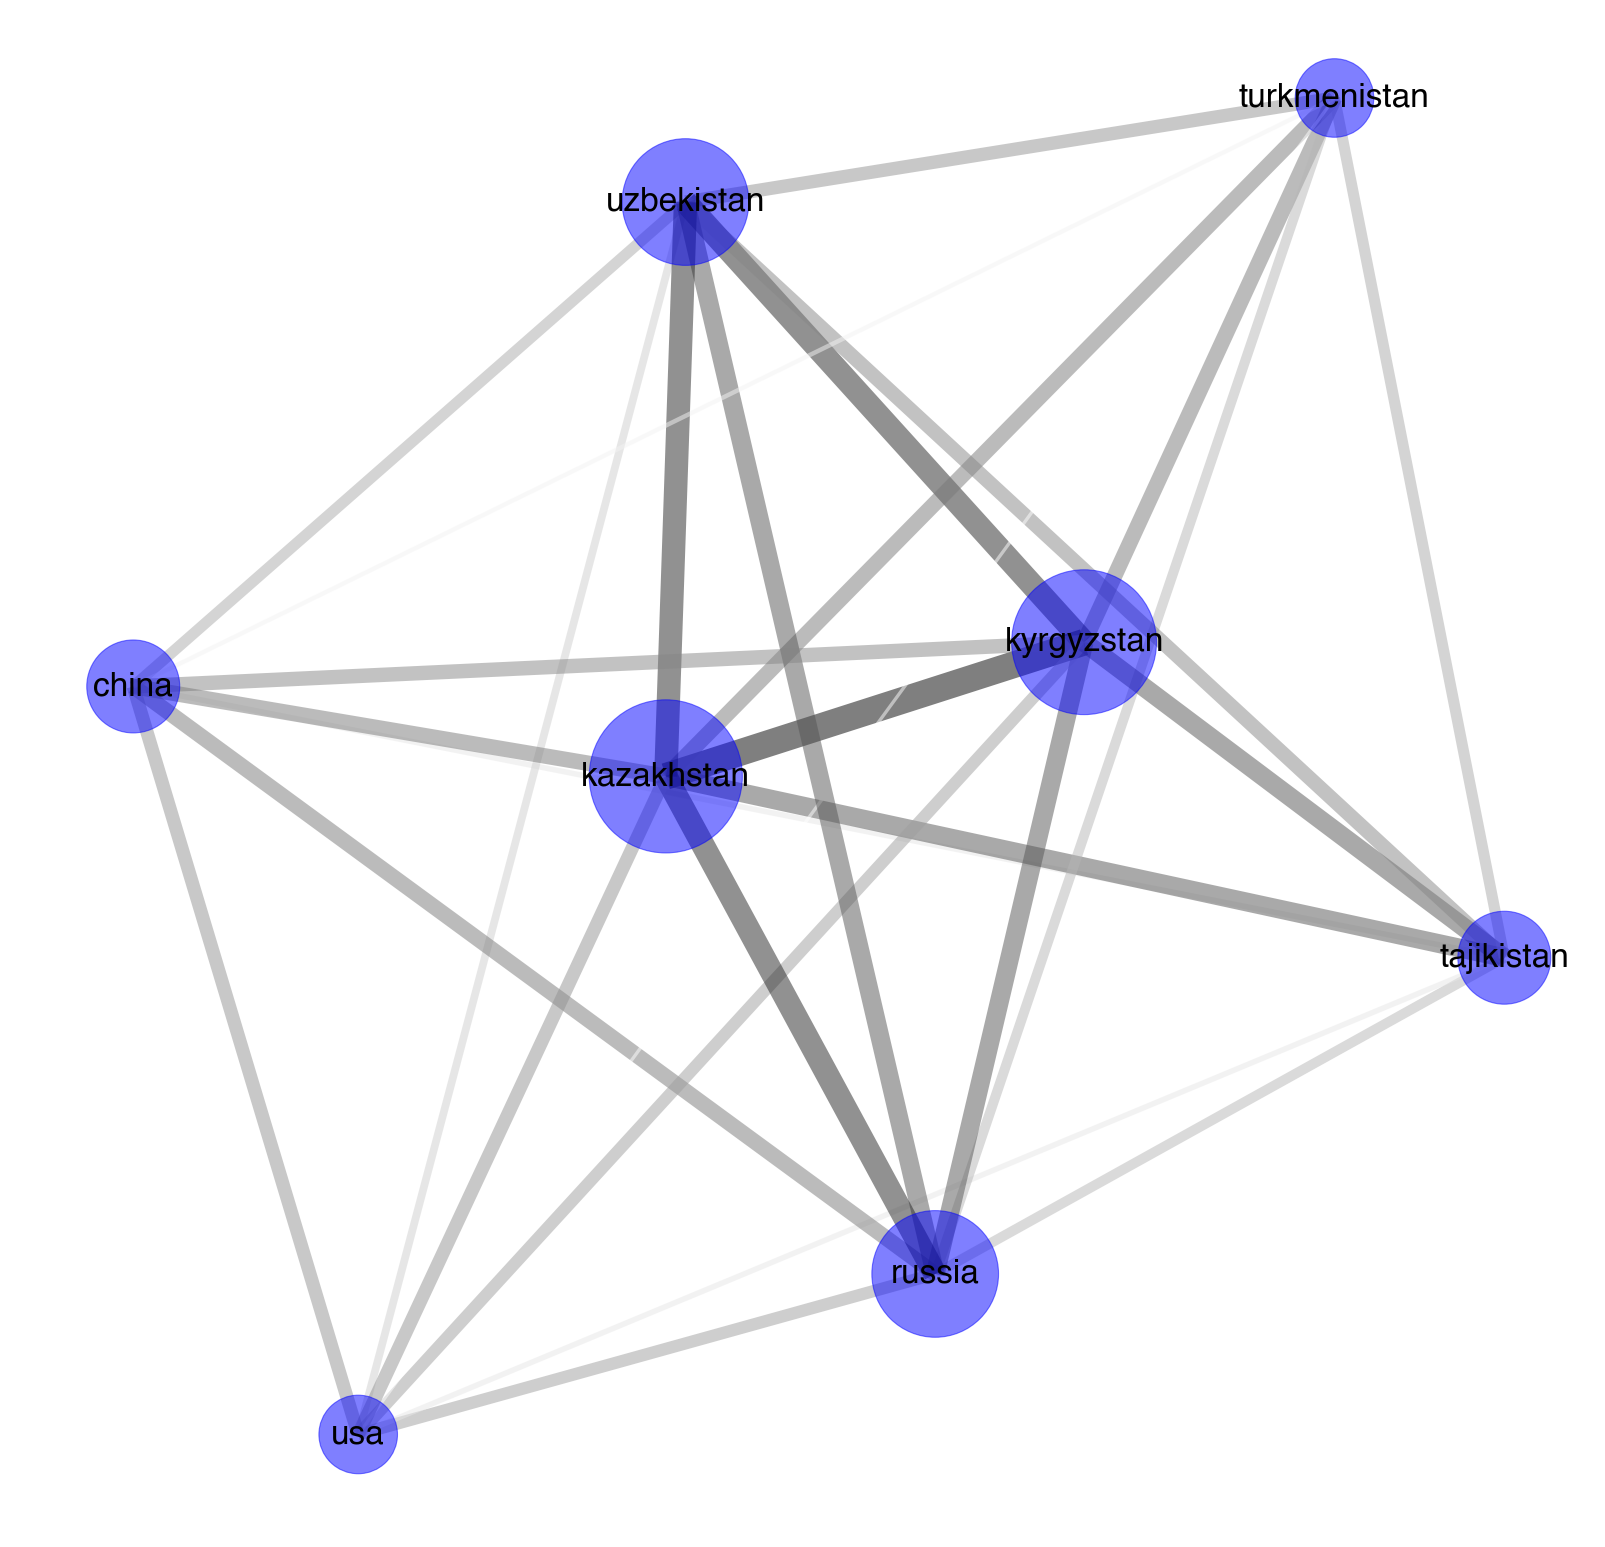

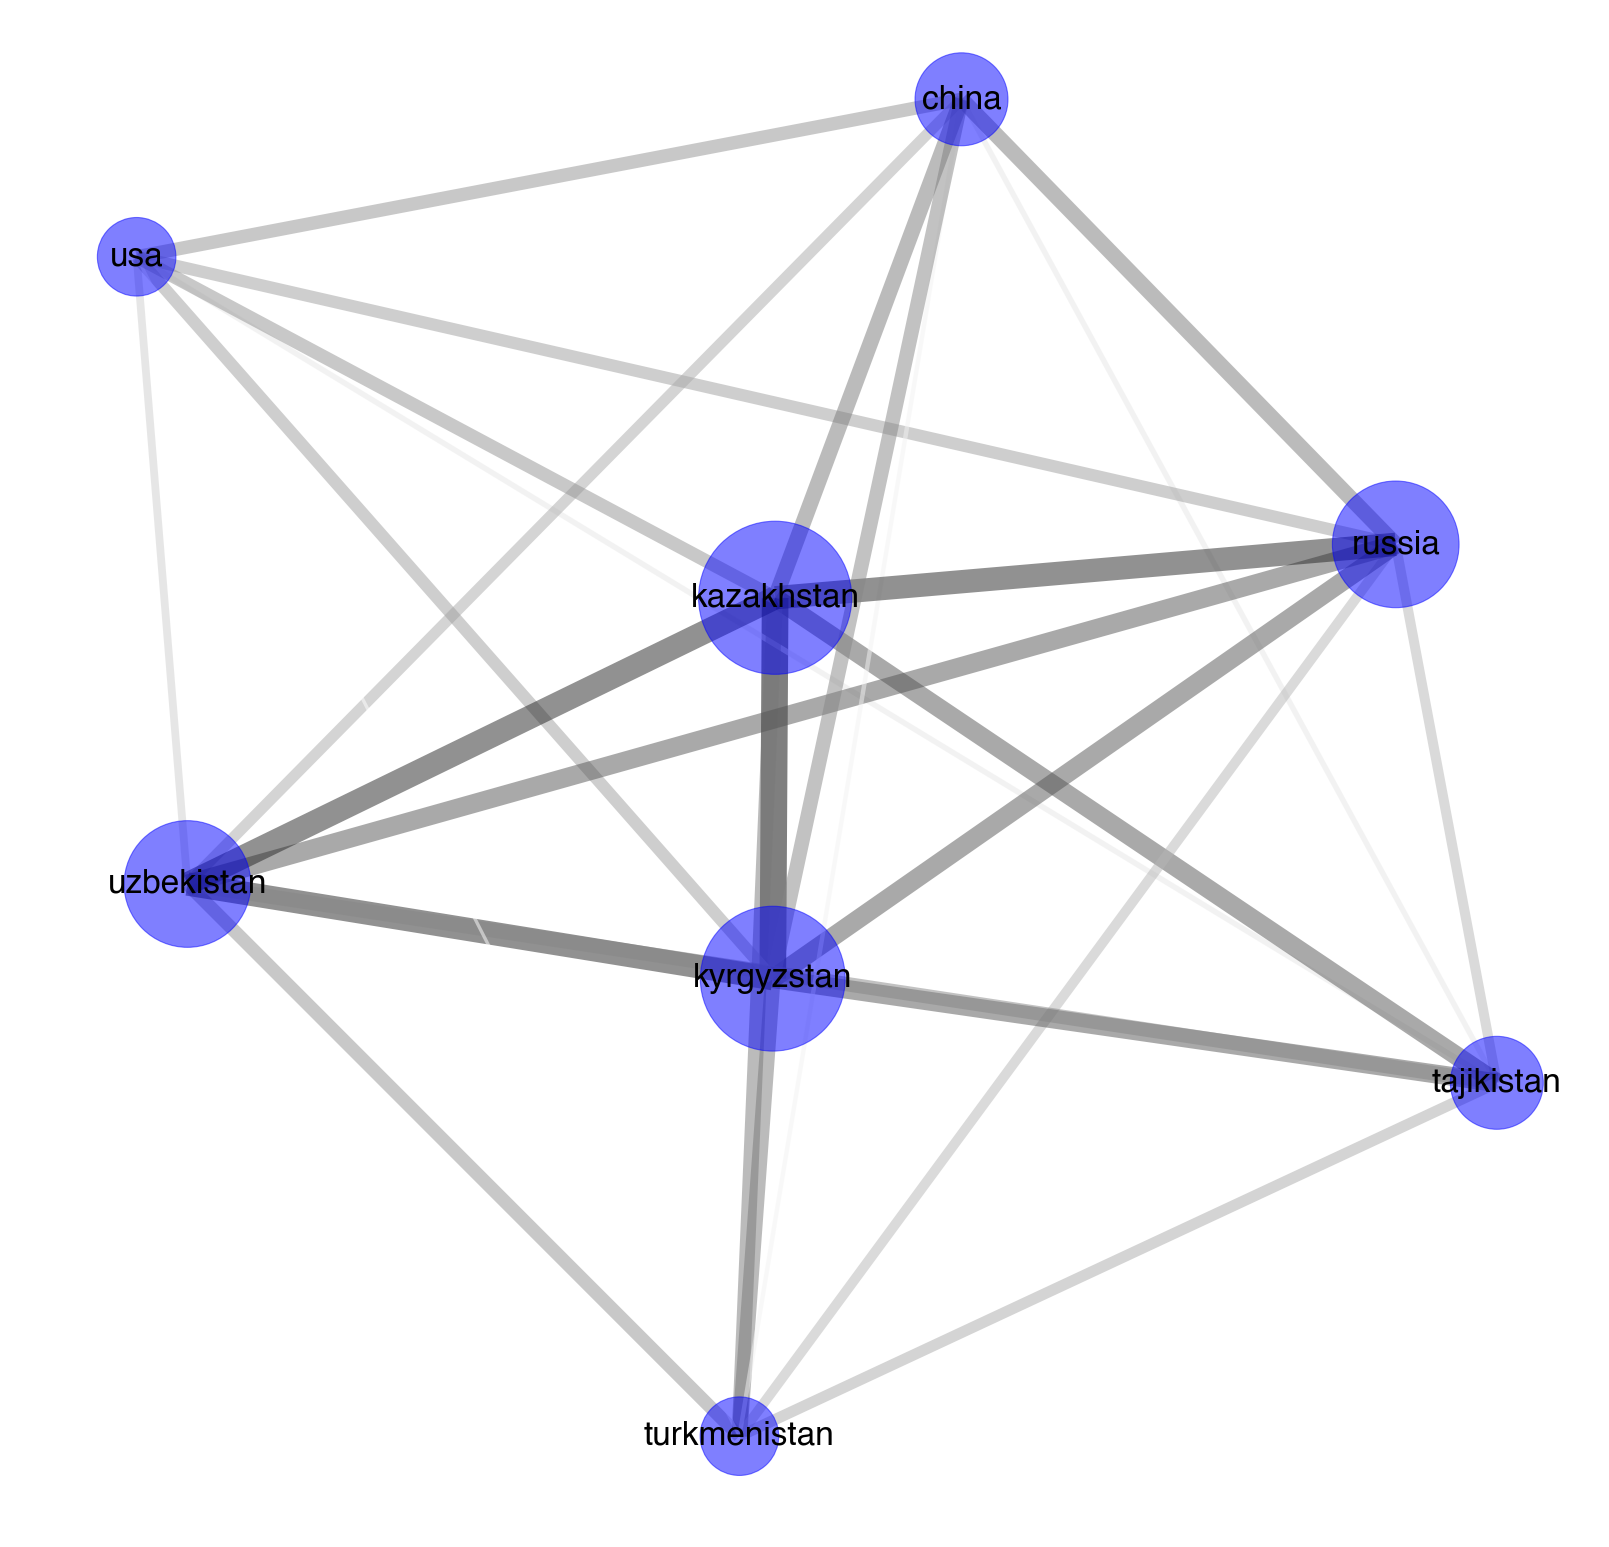

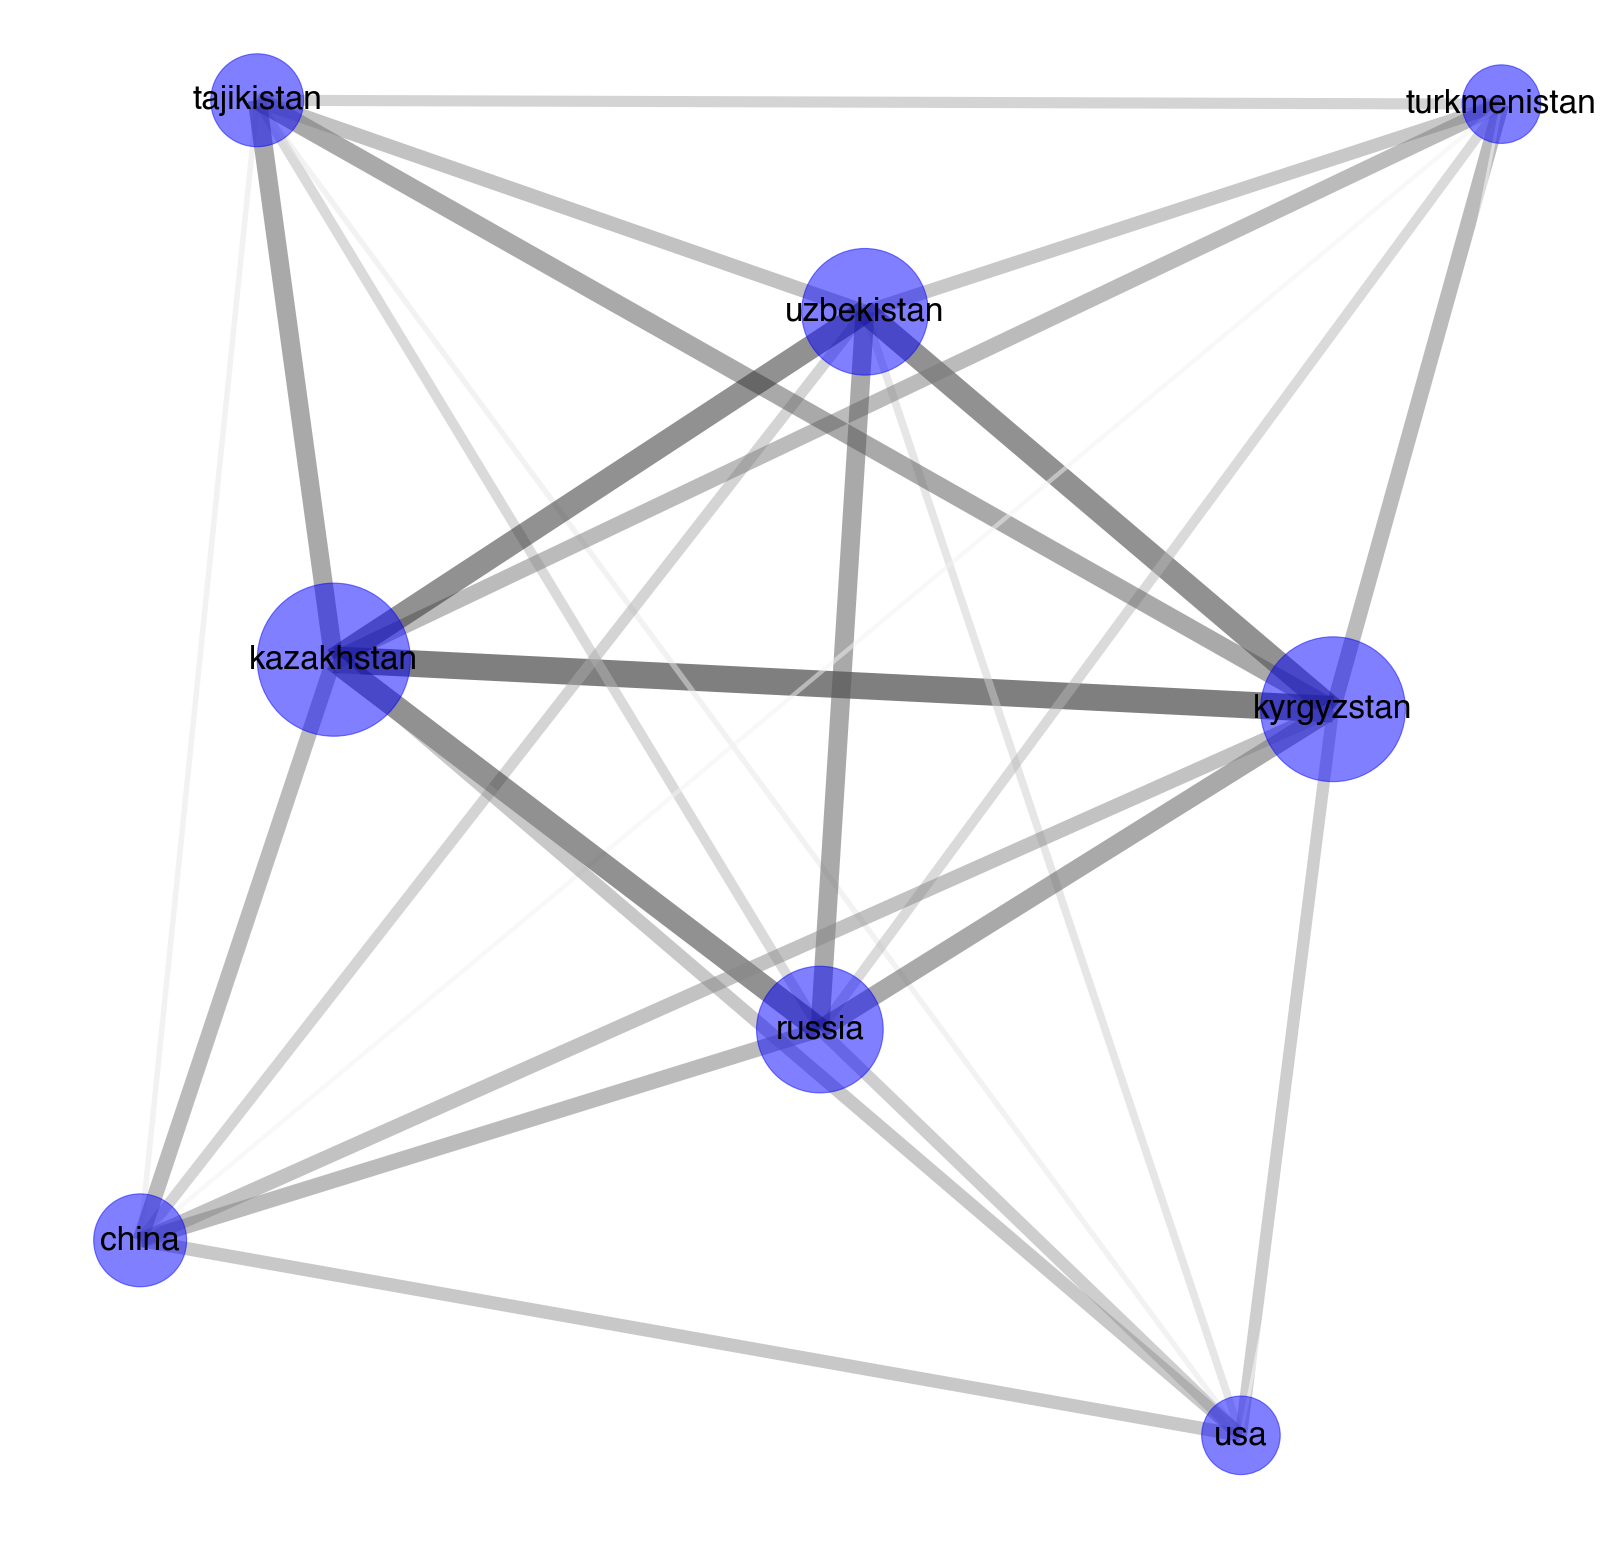

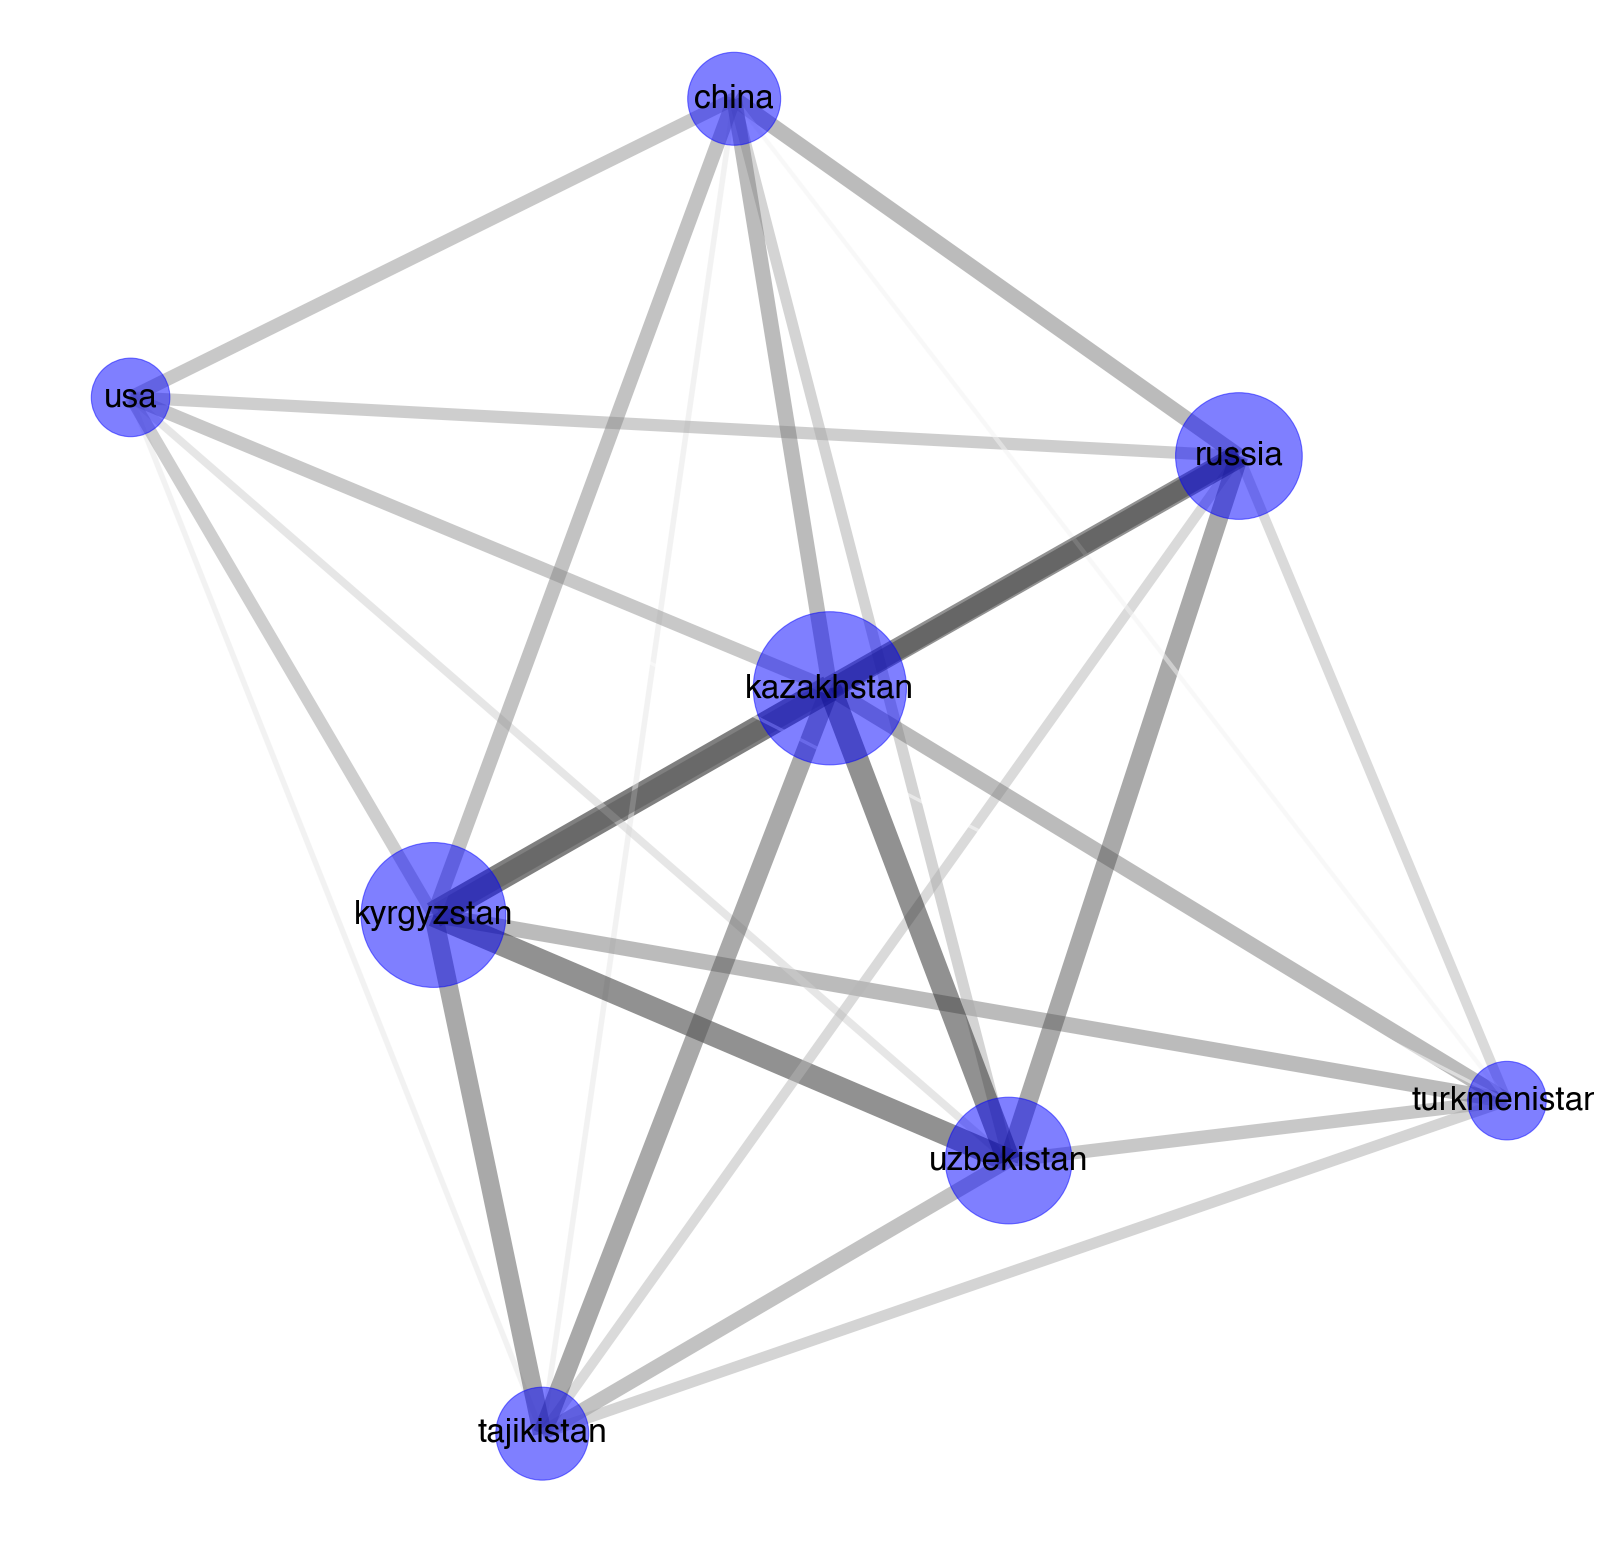

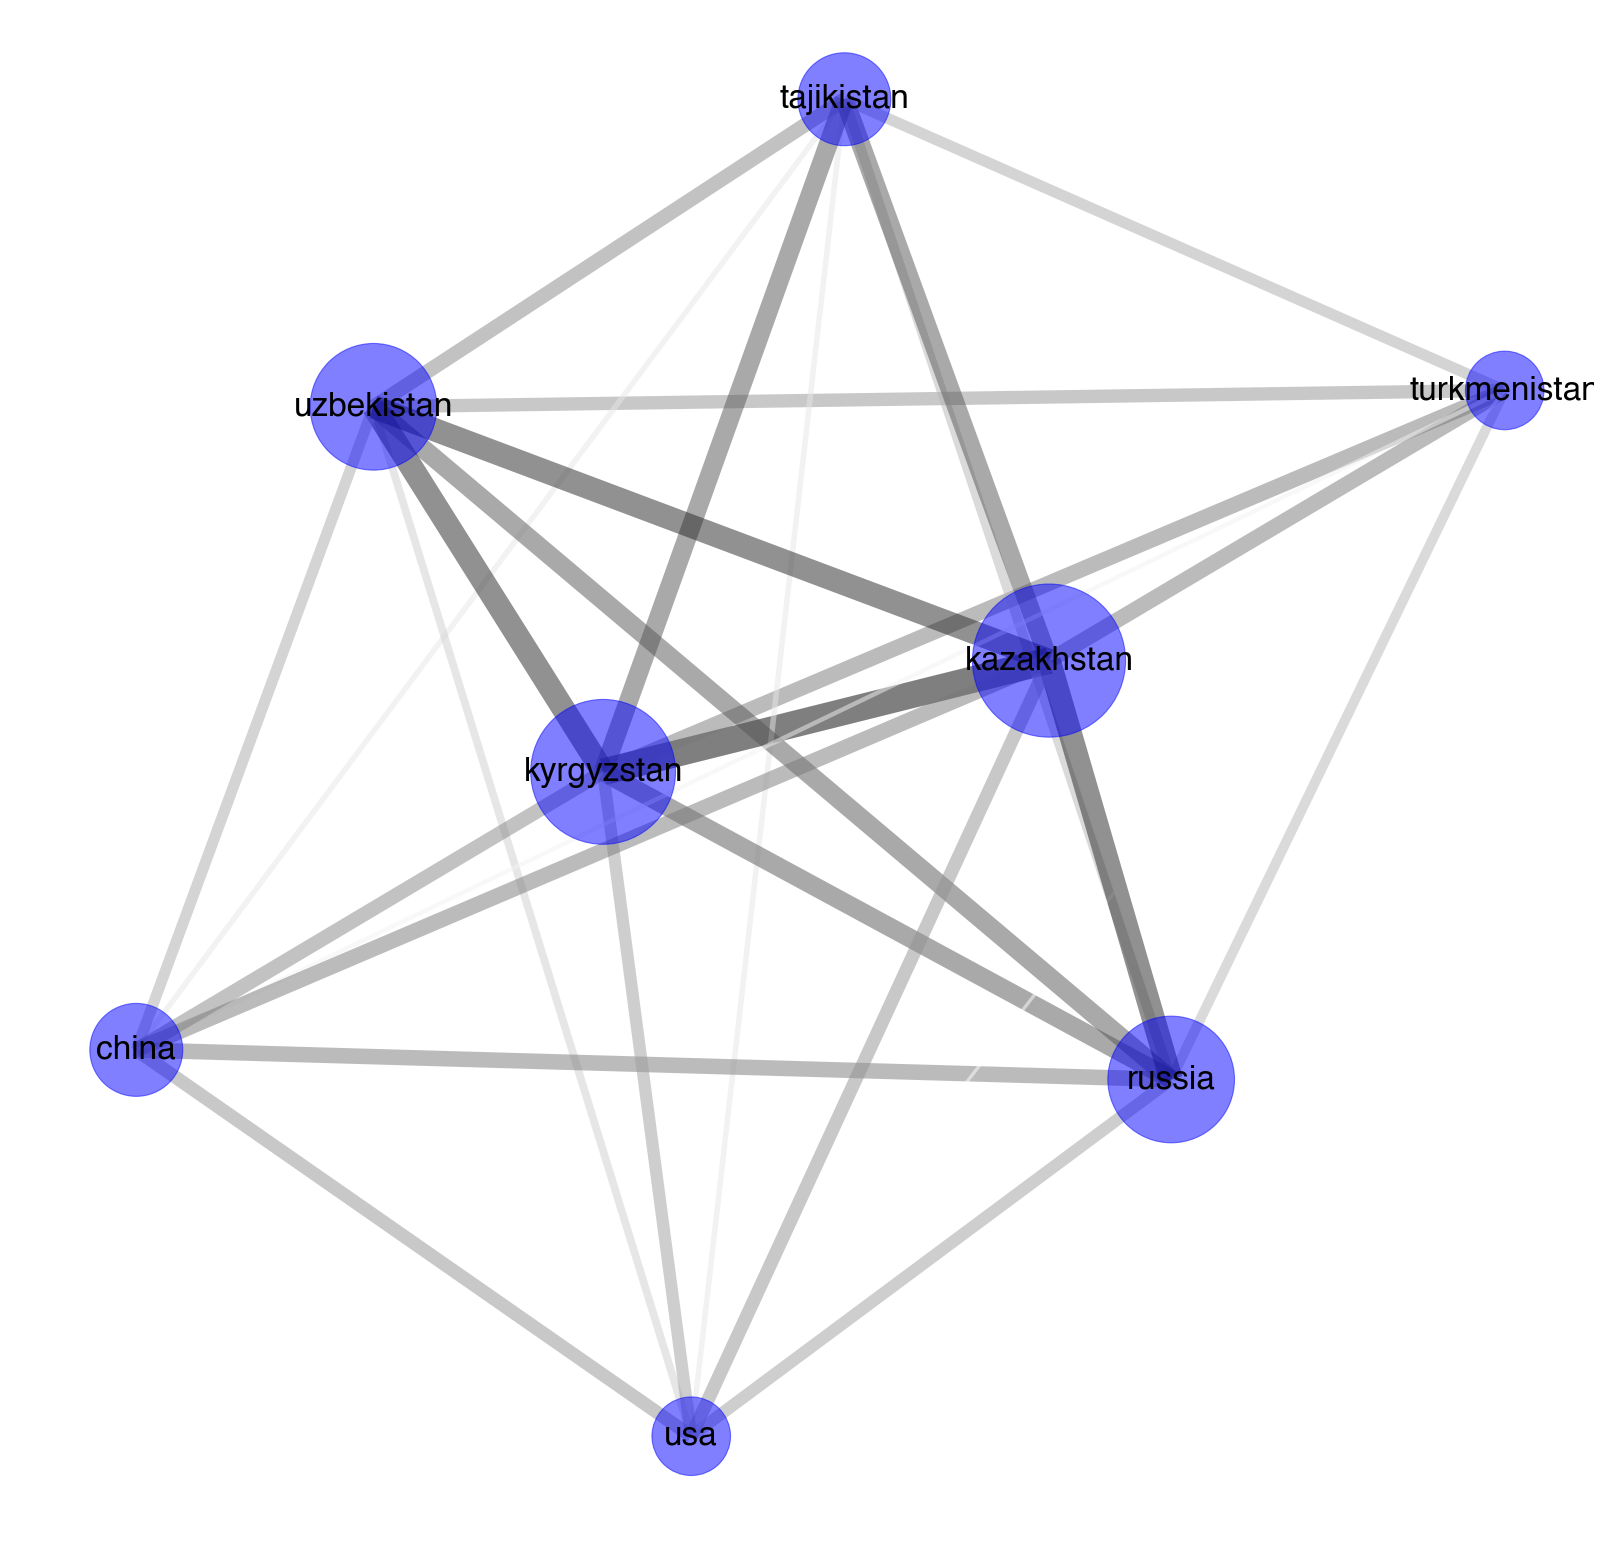

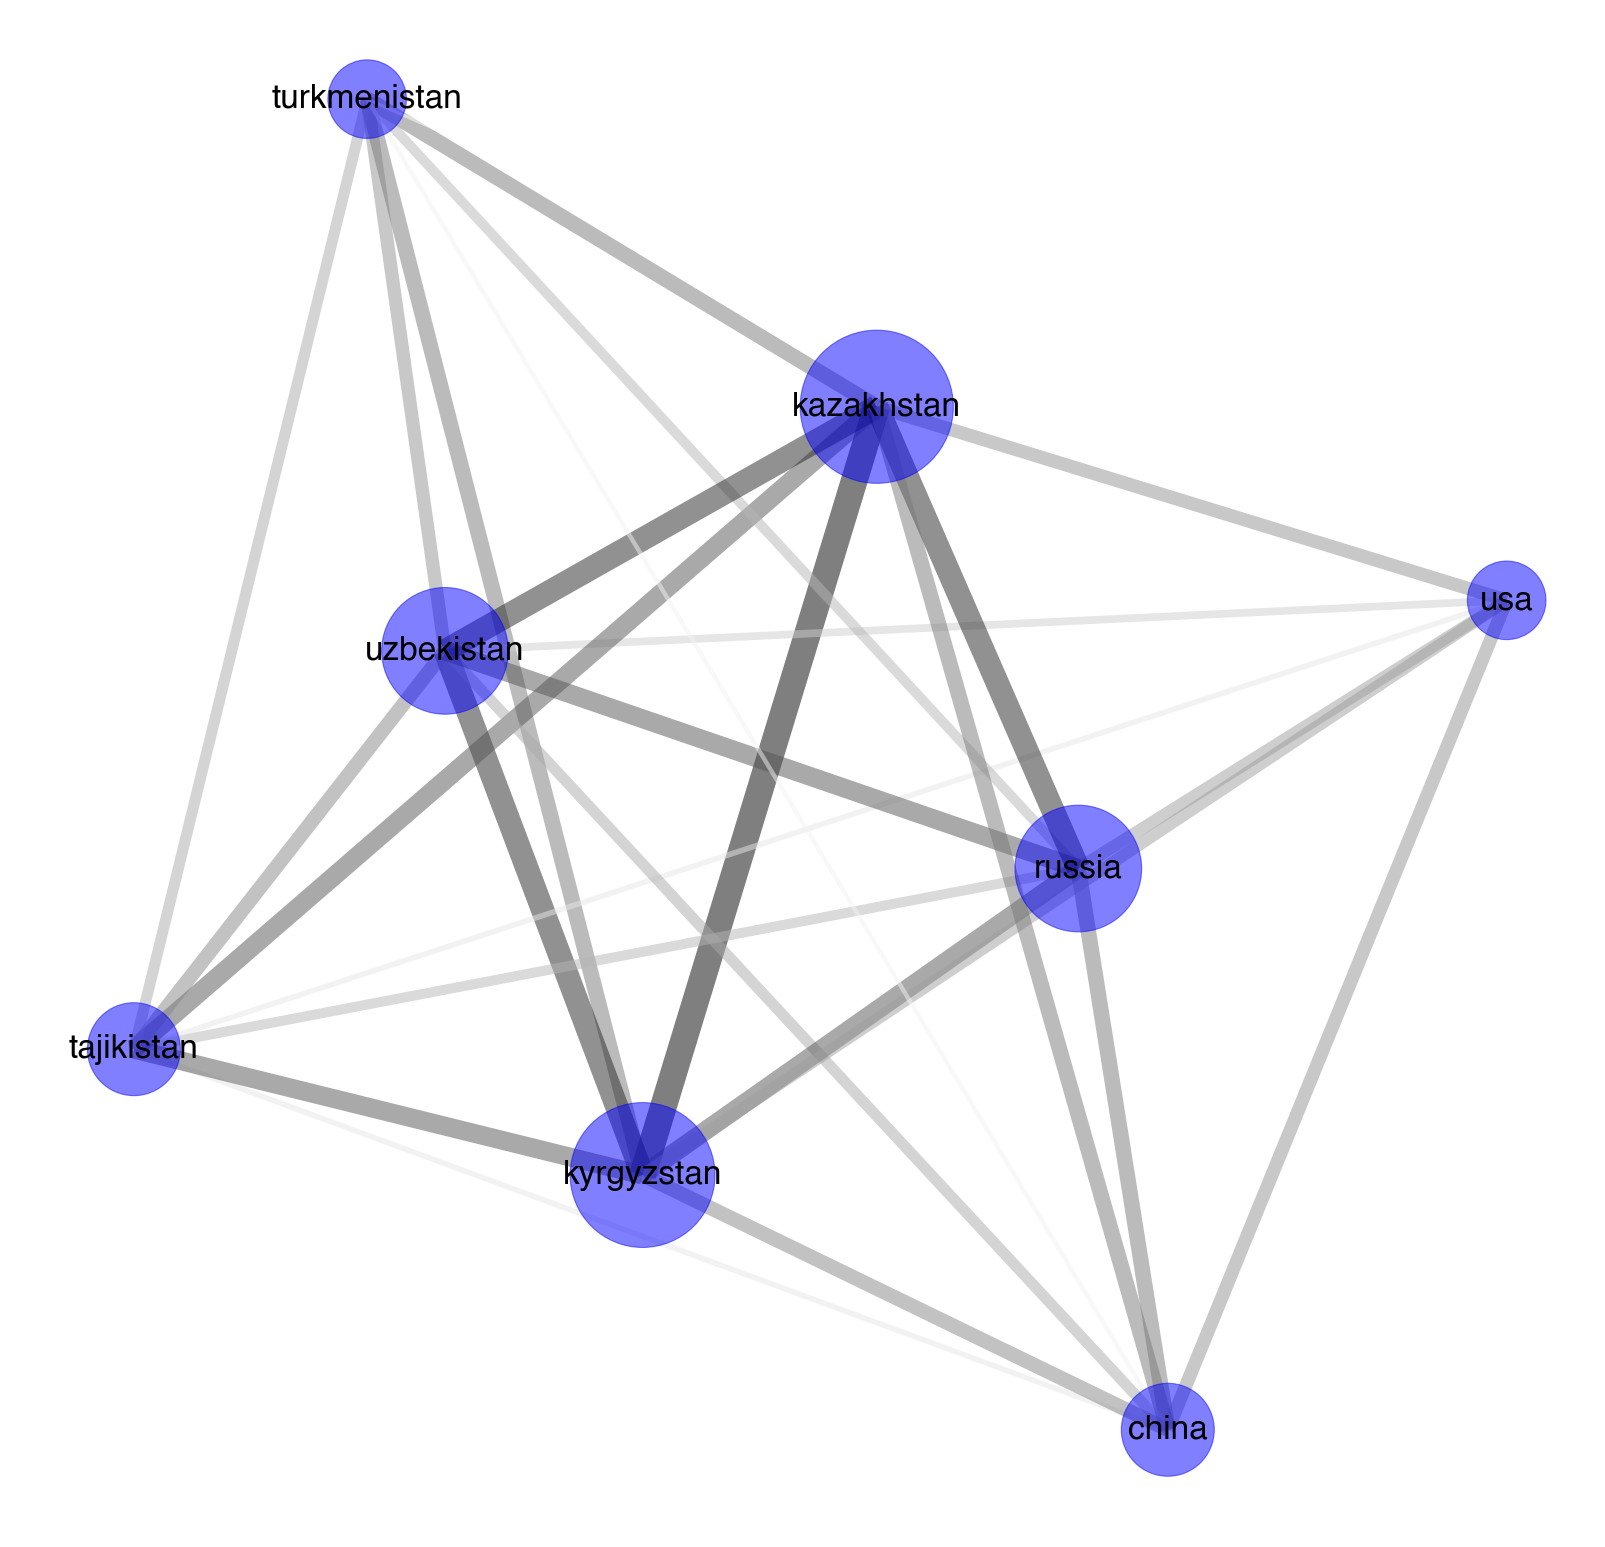

In [878]:
for i in range(20):
    plt.figure(num=None, figsize=(25, 25), dpi=80)

    pos=nx.spring_layout(G,iterations=800) # positions for all nodes

    # nodes
    #nx.draw_networkx_nodes(G,pos,node_size=100)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')

    nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights,alpha=0.5,node_size=dddnew,width=(np.array(weights)-2).tolist(), edge_cmap=plt.cm.binary)
    datename = "analysis" + datetime.now().strftime( "_%Y%m%d__%H_%M_%S" )

    plt.savefig('./plots_adjusted_new/%s%s.png'%(fn.replace("./",""),datename))

    ## edges
    #nx.draw_networkx_edges(G,pos,edgelist=elarge,
    #                    width=1)
    #nx.draw_networkx_edges(G,pos,edgelist=esmall,
    #                    width=1,alpha=0.5,edge_color='b',style='dashed')
    #
    ## labels
    #nx.draw_networkx_labels(G,pos,font_size=30,font_family='sans-serif')
    #
    #plt.axis('off')
    #plt.savefig("weighted_graph.png") # save as png
    #plt.show() # display

In [775]:
abgl=[]
for i in G:
    abgl.append(i)
ddd = (d*1000-13000.0).tolist()
dddnew=[]
for i in abgl:
    print i 
    print c.index(i)
    abgl.index(i)
    dddnew.append(ddd[c.index(i)])

In [780]:
print abgl

['kyrgyzstan', 'turkmenistan', 'usa', 'tajikistan', 'uzbekistan', 'china', 'kazakhstan', 'russia']


In [774]:
print c

['russia', 'china', 'kazakhstan', 'kyrgyzstan', 'tajikistan', 'turkmenistan', 'uzbekistan', 'usa']


In [782]:
ddd = (d*1000-min(dmin)-6000).tolist()
dddnew=[]
for i in abgl:
    print i 
    print c.index(i)
    abgl.index(i)
    dddnew.append(ddd[c.index(i)])

kyrgyzstan
3
turkmenistan
5
usa
7
tajikistan
4
uzbekistan
6
china
1
kazakhstan
2
russia
0


In [783]:
dddnew

[8000.0, 6000.0, 2000.0, 1000.0, 10000.0, 2000.0, 11000.0, 9000.0]

In [767]:
(d*1000-min(dmin)-6000).tolist()

[9000.0, 2000.0, 11000.0, 8000.0, 1000.0, 6000.0, 10000.0, 2000.0]

In [768]:
(np.array(weights)-min(weightmin)).tolist()

[15.0,
 15.0,
 3.0,
 13.0,
 7.0,
 14.0,
 10.0,
 8.0,
 3.0,
 10.0,
 11.0,
 9.0,
 15.0,
 13.0,
 12.0,
 6.0,
 11.0,
 9.0,
 5.0,
 16.0,
 19.0,
 9.0,
 6.0,
 18.0,
 8.0,
 7.0,
 9.0,
 9.0]

In [681]:
weightmin.append(min((np.array(weights)).tolist()))

In [507]:
dmin.append(min((d*1000).tolist()))

In [682]:
print weightmin,dmin

[2.0, 5.0, 5.0, 5.0, 6.0, 8.0, 21.0, 5.0, 5.0] [7000.0, 14000.0, 18000.0, 18000.0, 18000.0, 21000.0, 34000.0]


In [520]:
print d

[ 75.  71.  36.  42.  53.  81.  49.  47.  37.  34.  44.  67.  69.]


In [581]:
min(d)

14.0

In [ ]:
node_size=(d*1000-(min(d*1000)-2000)).tolist(),width=(np.array(weights)-(min(np.array(weights)))-2).tolist(), edge_cmap=plt.cm.binary)

In [590]:
(d*1000-(min(dmin)-30000)).tolist()

[45000.0, 38000.0, 47000.0, 44000.0, 37000.0, 42000.0, 46000.0, 38000.0]

In [593]:
(d*1000-min(dmin)-3000).tolist()

[12000.0, 5000.0, 14000.0, 11000.0, 4000.0, 9000.0, 13000.0, 5000.0]

In [785]:
www = (np.array(weights)-min(weightmin)).tolist()

In [786]:
print www

[15.0, 15.0, 3.0, 13.0, 7.0, 14.0, 10.0, 8.0, 3.0, 10.0, 11.0, 9.0, 15.0, 13.0, 12.0, 6.0, 11.0, 9.0, 5.0, 16.0, 19.0, 9.0, 6.0, 18.0, 8.0, 7.0, 9.0, 9.0]


In [787]:
print min(dmin)-6000

1000.0


In [788]:
print -min(dmin)-6000

-13000.0


In [789]:
-min(weightmin)

-2.0